<a href="https://colab.research.google.com/github/Umaymach/PFE_TSclustering/blob/main/Clustering_des_agrumes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Collecte de données**

## **La ville de chaque cultures**
**Nous spécifions les cultures les plus produites au Maroc, ainsi les stations dont nous allons collecter les données de météo**

Blé Casablanca 


Mais Tadla


Pommes  Midelt


Abricots  Marrakech

Oranges Berkane

Pomme de terre Moulouya

Les betteraves à sucre   Kénitra

Olives Meknes 



## **Dimensions**
**Nous spécifions les coordonnées géographiques des villes selectionnées**

Casablanca : (33.5731104, -7.5898434)

Tadla : (32.004262,-6.578339)

Kénitra : (34.15 , 06.40)

Berkane : (34.5512, 2.1911)

Midelt : (32.68, -4.74)

Marrakech : (31.63 , -8.008)

Moulouya : (35.05,02.25)

Meknès : (33.57, 05,33)



In [ ]:
import pandas as pd
import requests
import csv

In [ ]:
#Collecte grace aux API

locations = [(33.5731104, -7.5898434),(32.004262,-6.578339),(34.15,6.40),(34.9280,-2.3281),(32.68, -4.74), (33.57, 5.33)]
output = r""
url = r"https://power.larc.nasa.gov/api/temporal/daily/point?start=1981&end=2021&longitude={longitude}&latitude={latitude}&community=ag&parameters=T2M_MAX,T2M_MIN,PRECTOTCORR,QV2M,WS10M&format=csv&header=False"

for latitude, longitude in locations:
    request = url.format(longitude=longitude, latitude=latitude)
    response = requests.get(url=request, verify=True, timeout=30.00)
    open(f'Data_{latitude,longitude}.csv', 'wb').write(response.content)


In [ ]:
#Lecture de la bases de données collecté pour la location Casablanca
series= pd.read_csv('Data_(34.928, -2.3281).csv')
series

YEAR  DOY  T2M_MAX  T2M_MIN  PRECTOTCORR  QV2M  WS10M
0      1981    1    15.80     4.40         0.02  4.88   3.84
1      1981    2    15.63     4.37         0.00  4.70   2.78
2      1981    3    16.55     4.08         0.00  4.88   2.70
3      1981    4    16.73     5.01         0.00  5.37   4.91
4      1981    5    16.09     4.49         0.47  6.04   4.12
...     ...  ...      ...      ...          ...   ...    ...
14970  2021  361    21.62    12.52         0.02  9.28   5.18
14971  2021  362    20.51    11.30         0.02  9.22   4.40
14972  2021  363    23.68    11.62         0.00  7.39   3.04
14973  2021  364    25.40    11.49         0.02  5.49   2.83
14974  2021  365    22.26    10.96         0.02  5.68   2.38

[14975 rows x 7 columns]

In [ ]:
series = series.rename(columns={'YEAR': 'Année'})
series

In [ ]:
#Création de la colonne de date contenant la date en format usuelle
series["combined"] = series["Année"]*1000 + series["DOY"]
series["Date"] = pd.to_datetime(series["combined"], format = "%Y%j")
series['Jour-Mois']=series['Date'].dt.strftime('%d-%m')
series.head()

Année  DOY  T2M_MAX  T2M_MIN  PRECTOTCORR  QV2M  WS10M  combined  \
0   1981    1    15.80     4.40         0.02  4.88   3.84   1981001   
1   1981    2    15.63     4.37         0.00  4.70   2.78   1981002   
2   1981    3    16.55     4.08         0.00  4.88   2.70   1981003   
3   1981    4    16.73     5.01         0.00  5.37   4.91   1981004   
4   1981    5    16.09     4.49         0.47  6.04   4.12   1981005   

        Date Jour-Mois  
0 1981-01-01     01-01  
1 1981-01-02     02-01  
2 1981-01-03     03-01  
3 1981-01-04     04-01  
4 1981-01-05     05-01

In [ ]:
series=series.set_index("Date")
series=series[['Année',"T2M_MAX",'T2M_MIN','PRECTOTCORR','QV2M','WS10M','Jour-Mois']]
series

Année  T2M_MAX  T2M_MIN  PRECTOTCORR  QV2M  WS10M Jour-Mois
Date                                                                   
1981-01-01   1981    15.80     4.40         0.02  4.88   3.84     01-01
1981-01-02   1981    15.63     4.37         0.00  4.70   2.78     02-01
1981-01-03   1981    16.55     4.08         0.00  4.88   2.70     03-01
1981-01-04   1981    16.73     5.01         0.00  5.37   4.91     04-01
1981-01-05   1981    16.09     4.49         0.47  6.04   4.12     05-01
...           ...      ...      ...          ...   ...    ...       ...
2021-12-27   2021    21.62    12.52         0.02  9.28   5.18     27-12
2021-12-28   2021    20.51    11.30         0.02  9.22   4.40     28-12
2021-12-29   2021    23.68    11.62         0.00  7.39   3.04     29-12
2021-12-30   2021    25.40    11.49         0.02  5.49   2.83     30-12
2021-12-31   2021    22.26    10.96         0.02  5.68   2.38     31-12

[14975 rows x 7 columns]

In [ ]:
#Supprimer tous les 31 lignes avec date 02 29
#series=series.loc[series["Day-Month"] != "02-29"]
#series


### **Transformation de la base de données AGDD et cumul de la precipitation**

In [ ]:
Tbase={'Agrumes': 13, 'Blé':6 , 'Mais': 3}

In [ ]:
Tbase

{'Agrumes': 13, 'Blé': 6, 'Mais': 3}

In [ ]:
series[f"GDD des {list(Tbase.keys())[0]}"]=(series["T2M_MAX"]+series["T2M_MIN"])/2-Tbase['Agrumes']

series['GDD des Agrumes'] = series['GDD des Agrumes'].clip(lower = 0)
series['AGDD'] = series.groupby(['Année'])['GDD des Agrumes'].transform(pd.Series.cumsum)
series['APRE'] = series.groupby(['Année'])['PRECTOTCORR'].transform(pd.Series.cumsum)
series.head(n=369)


Année  T2M_MAX  T2M_MIN  PRECTOTCORR  QV2M  WS10M Jour-Mois  \
Date                                                                      
1981-01-01   1981    15.80     4.40         0.02  4.88   3.84     01-01   
1981-01-02   1981    15.63     4.37         0.00  4.70   2.78     02-01   
1981-01-03   1981    16.55     4.08         0.00  4.88   2.70     03-01   
1981-01-04   1981    16.73     5.01         0.00  5.37   4.91     04-01   
1981-01-05   1981    16.09     4.49         0.47  6.04   4.12     05-01   
...           ...      ...      ...          ...   ...    ...       ...   
1981-12-31   1981    19.20    12.34        12.73  7.51   5.87     31-12   
1982-01-01   1982    16.89     9.04         0.67  7.08   3.83     01-01   
1982-01-02   1982    20.49     7.25         0.00  6.16   3.58     02-01   
1982-01-03   1982    21.65     7.98         0.00  5.31   3.64     03-01   
1982-01-04   1982    19.47     8.04         0.00  4.94   2.70     04-01   

            GDD des Agrumes      AGDD    APRE  
Date                                           
1981-01-01            0.000     0.000    0.02  
1981-01-02            0.000     0.000    0.02  
1981-01-03            0.000     0.000    0.02  
1981-01-04            0.000     0.000    0.02  
1981-01-05            0.000     0.000    0.49  
...                     ...       ...     ...  
1981-12-31            2.770  2139.560  331.45  
1982-01-01            0.000     0.000    0.67  
1982-01-02            0.870     0.870    0.67  
1982-01-03            1.815     2.685    0.67  
1982-01-04            0.755     3.440    0.67  

[369 rows x 10 columns]

# **Organize the data**




In [ ]:
#Affichage des données  
df=series[['Année',"AGDD",'APRE','QV2M','WS10M',"Jour-Mois"]]
#df['Date'] = pd.to_datetime(df['Date'])
#df=df.set_index('Date')
df.head(n=1523)

Année    AGDD   APRE  QV2M  WS10M Jour-Mois
Date                                                   
1981-01-01   1981   0.000   0.02  4.88   3.84     01-01
1981-01-02   1981   0.000   0.02  4.70   2.78     02-01
1981-01-03   1981   0.000   0.02  4.88   2.70     03-01
1981-01-04   1981   0.000   0.02  5.37   4.91     04-01
1981-01-05   1981   0.000   0.49  6.04   4.12     05-01
...           ...     ...    ...   ...    ...       ...
1985-02-27   1985  71.055  57.52  7.63   2.14     27-02
1985-02-28   1985  72.835  57.52  6.71   1.95     28-02
1985-03-01   1985  75.235  57.52  6.71   3.40     01-03
1985-03-02   1985  75.235  57.92  5.37   4.73     02-03
1985-03-03   1985  76.380  57.92  4.46   3.45     03-03

[1523 rows x 6 columns]

#**Clustering for each variable**

In [ ]:
%pip install tslearn
%pip install netdata_pandas
%pip install am4894plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 358 kB 8.1 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
  Created wheel for asks: filename=asks-3.0.0-py3-none-any.whl size=25707 sha256=f1d06fb548837823554405b4df84df9880d520a7d486668cf2ac62374e5c73b0
  Stored in directory: /root/.cache/pip/wheels/c0/b9/a5/c3817d576ca6277fac352782a6a7ba5fee25e4d6db9d9bd278
Successfully built asks
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from sklearn.preprocessing import StandardScaler
from tslearn.metrics import dtw
#from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from netdata_pandas.data import get_data, get_chart_list
from am4894plots.plots import plot_lines, plot_lines_grid

/usr/local/lib/python3.7/dist-packages/trio/_core/_multierror.py:464: RuntimeWarning: IPython detected, but you already have a custom exception handler installed. I'll skip installing Trio's custom handler, but this means MultiErrors will not show full tracebacks.
  category=RuntimeWarning,


## **For AGDD**

In [ ]:
cols=df["Jour-Mois"].unique().tolist()


In [ ]:
T= df.pivot_table(index="Année", columns="Jour-Mois", values="AGDD")[cols[:-1]] 
T.head(n=10)

Jour-Mois  01-01  02-01  03-01  ...     29-12     30-12     31-12
Année                           ...                              
1981       0.000  0.000  0.000  ...  2132.995  2136.790  2139.560
1982       0.000  0.870  2.685  ...  2029.900  2029.900  2029.900
1983       0.000  0.000  0.000  ...  2312.260  2312.260  2312.260
1984       0.145  0.295  0.295  ...  1977.370  1977.370  1977.370
1985       0.000  0.000  0.000  ...  2309.655  2309.655  2309.655
1986       1.235  2.430  2.430  ...  2043.845  2043.845  2043.845
1987       0.000  0.000  0.000  ...  2300.220  2300.220  2300.220
1988       0.000  0.000  0.550  ...  2263.380  2263.380  2263.380
1989       0.000  0.000  0.000  ...  2391.690  2391.725  2391.725
1990       0.360  0.955  0.955  ...  2294.365  2295.460  2295.785

[10 rows x 365 columns]

In [ ]:
#pd.set_option('max_columns', 366)
#S=T[cols[:-1]]
#S.head(n=10)
#drop the day 29 
#T=T.drop(['29-02'], axis=1)
#T.head() already removed using col[-1]

In [ ]:
T.isnull().sum().sum()

0

### Visualisation

Text(0.5, 0, 'Jour et Mois')

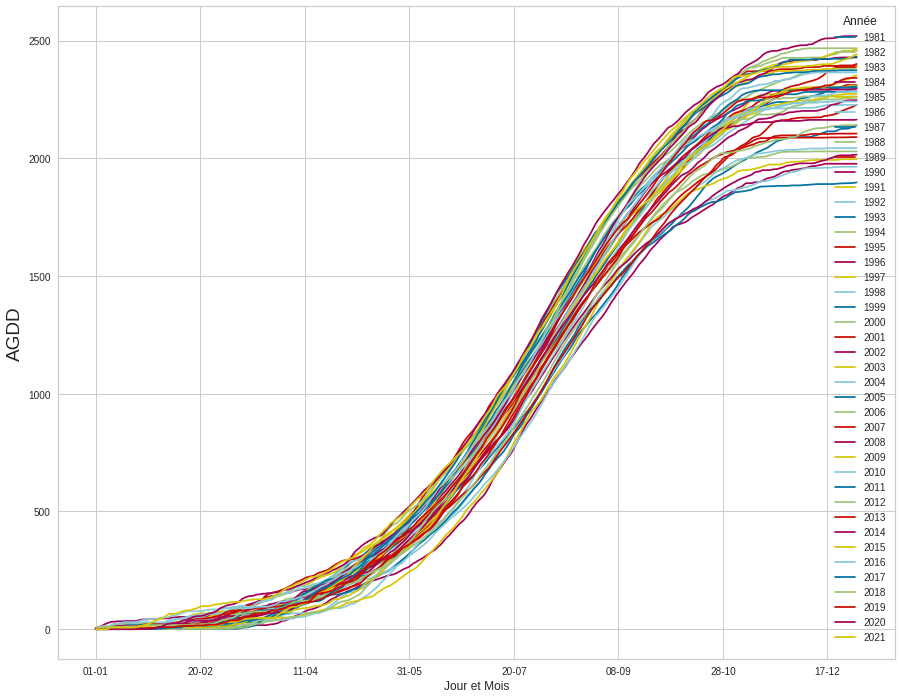

In [ ]:
import matplotlib as plt
ax = T.T.plot(figsize=(15, 12))
ax.set_ylabel('AGDD', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)

In [ ]:
T.head()

Jour-Mois  01-01  02-01  03-01  ...     29-12     30-12     31-12
Année                           ...                              
1981       0.000  0.000  0.000  ...  2132.995  2136.790  2139.560
1982       0.000  0.870  2.685  ...  2029.900  2029.900  2029.900
1983       0.000  0.000  0.000  ...  2312.260  2312.260  2312.260
1984       0.145  0.295  0.295  ...  1977.370  1977.370  1977.370
1985       0.000  0.000  0.000  ...  2309.655  2309.655  2309.655

[5 rows x 365 columns]

Text(0.5, 0, 'Jour et Mois')

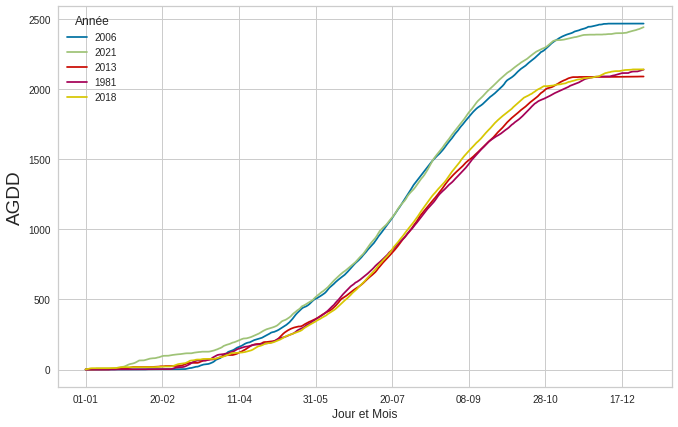

In [ ]:
import matplotlib as plt
ax = T.loc[[ 2006, 2021, 2013,1981, 2018]].T.plot(figsize=(11, 7))
ax.set_ylabel('AGDD', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)

### min max

In [ ]:
from sklearn.preprocessing import StandardScaler
Tnorm = (T-min(T.min()))/(max(T.max())-min(T.min()))
#col = T.columns
#Tnorm = scaler.fit_transform(T)
#Tnorm= pd.DataFrame(Tnorm,columns=col)

pd.set_option('max_columns', 10)
Tnorm.head()

Jour-Mois     01-01     02-01     03-01     04-01     05-01  ...     27-12  \
Année                                                        ...             
1981       0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.844132   
1982       0.000000  0.000345  0.001066  0.001365  0.002090  ...  0.805634   
1983       0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.917698   
1984       0.000058  0.000117  0.000117  0.000117  0.000117  ...  0.784786   
1985       0.000000  0.000000  0.000000  0.000044  0.000097  ...  0.915224   

Jour-Mois     28-12     29-12     30-12     31-12  
Année                                              
1981       0.845325  0.846551  0.848057  0.849156  
1982       0.805634  0.805634  0.805634  0.805634  
1983       0.917698  0.917698  0.917698  0.917698  
1984       0.784786  0.784786  0.784786  0.784786  
1985       0.916664  0.916664  0.916664  0.916664  

[5 rows x 365 columns]

Text(0.5, 0, 'Day and month')

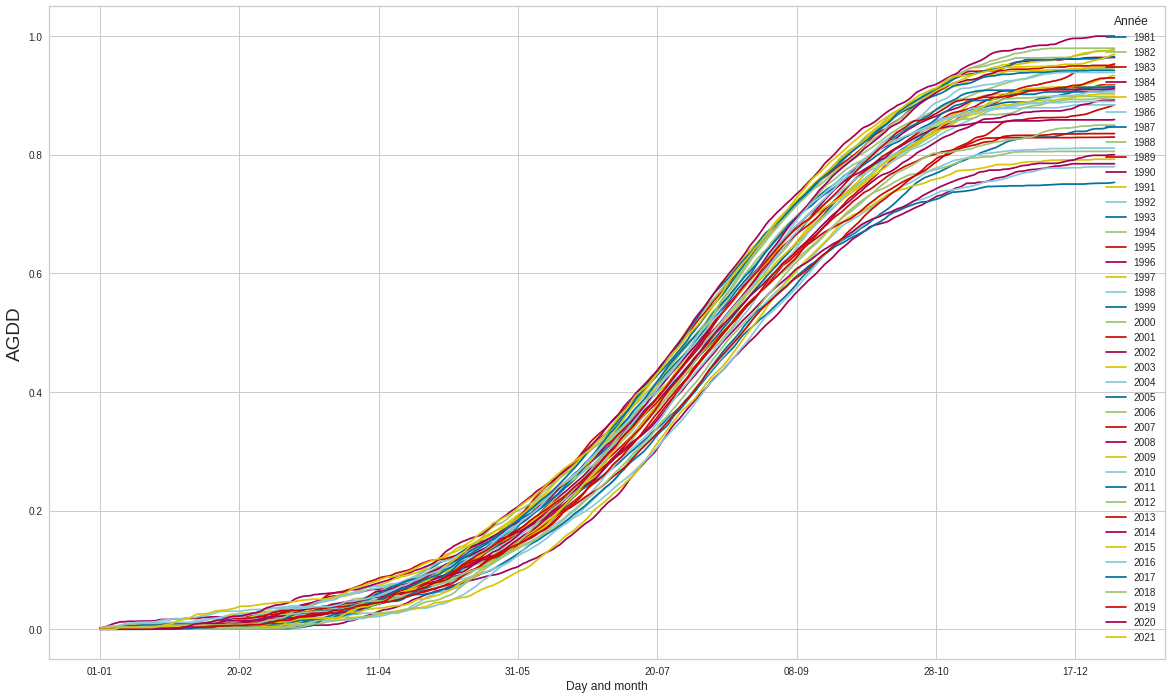

In [ ]:
import matplotlib as plt
ax = Tnorm.T.plot(figsize=(20, 12))
ax.set_ylabel('AGDD', fontsize=19)
ax.set_xlabel('Day and month', fontsize=12)

### Kelbow

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":   10}
plt.figure(figsize=(6.4,4.8))

visualizer=kelbow_visualizer(TimeSeriesKMeans(random_state=5, metric='dtw', metric_params=metric_params), Tnorm, k=(2,10),locate_elbow=True,timings=False)
num_K= visualizer.elbow_value_

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
import tslearn.clustering
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from sklearn.preprocessing import StandardScaler
from tslearn.metrics import dtw

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from netdata_pandas.data import get_data, get_chart_list
from am4894plots.plots import plot_lines, plot_lines_grid

In [ ]:
# On choisit la distance DTW et on fixe 'r' à 10
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
# sakoe_chiba_radius=None, itakura_max_slope=None
models = tslearn.clustering.TimeSeriesKMeans(n_clusters=3, metric='dtw',random_state=5, metric_params=metric_params)
predictions = models.fit_predict(Tnorm)
print(predictions)

In [ ]:
predictions.shape

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
X_train = Tnorm.values
for yi in range(3):
    plt.subplot(2, 2, yi + 1)
    for xx in X_train[predictions == yi]:
        _index = T.columns.values
        n_indices = _index.shape[0]
        _index = [_index[i] for i in range(n_indices) if i%31==0 ]
        plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.xticks(ticks = [i for i in range(n_indices) if  i%31==0], labels = _index)
    plt.plot(models.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train.shape[1])
    # plt.ylim(-10, 10)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")


In [ ]:
T["cluster"] = predictions
T.head()

In [ ]:
#T2=pd.DataFrame(T)
#T2=T.copy(deep=True)
T.insert(0, "Date", T.index)
T.head()

In [ ]:
T_melted = pd.melt(T, id_vars =  ["Date", "cluster"], value_name="AGDD")
T_melted.reset_index(inplace=True, drop = True)

In [ ]:
T_melted

In [ ]:
#from datetime import datetime
#T_melted["Day-Month"] = [datetime.strptime(T_melted["Day-Month"][i], "%d-%m") for i in range(T_melted.shape[0])]

In [ ]:
import seaborn as sns
_index = Tnorm.columns.values
n_indices = _index.shape[0]
_index = [_index[i] for i in range(n_indices) if i%31==0 ]
plt.figure(figsize = (20, 10))
sns.scatterplot(x = "Jour-Mois", y = "AGDD", hue = "cluster", data = T_melted, palette="Set1")
flatui = ["#9b59b6", "#3498db", "orange"]
# sns.set_palette(flatui)
plt.xticks(ticks = [i for i in range(n_indices) if  i%31==0], labels = _index)
plt.show()


In [ ]:
print('Cluster 1 :', list(T[T.cluster == 0].index))
print('Cluster 2 :', list(T[T.cluster == 1].index))
print('Cluster 3 :', list(T[T.cluster == 2].index))
print('Cluster 4 :', list(T[T.cluster == 3].index))
print('Cluster 5 :', list(T[T.cluster == 4].index))


###**Metrics for clustering validation** 

**Silhouette score:** 

In [ ]:
T= df.pivot_table(index="Année", columns="Jour-Mois", values="AGDD")[cols[:-1]]
T.head()


In [ ]:
#The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters.

In [ ]:
import sklearn
#from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw

In [ ]:
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
tslearn.clustering.silhouette_score(Tnorm,predictions, metric="dtw",random_state=5, metric_params=metric_params) 

**Calinski-Harabasz Index :  the Variance Ratio Criterion.**

**The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion**

In [ ]:
from sklearn.metrics import calinski_harabasz_score


In [ ]:
results = {}

for i in range(2,8):
    metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
    TimeSeriesKMean =  tslearn.clustering.TimeSeriesKMeans(n_clusters=i, metric='dtw',random_state=10, metric_params=metric_params)
    labels = TimeSeriesKMean.fit_predict(Tnorm)
    db_index = calinski_harabasz_score(Tnorm, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [ ]:
results = {}

for i in range(2,10):
    metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
    TimeSeriesKMean =  tslearn.clustering.TimeSeriesKMeans(n_clusters=i, metric='dtw',random_state=5, metric_params=metric_params)
    labels = TimeSeriesKMean.fit_predict(Tnorm)
    db_index = calinski_harabasz_score(Tnorm, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [ ]:
labels

In [ ]:
import  sklearn


In [ ]:
sklearn.metrics.calinski_harabasz_score(Tnorm,predictions )

**Davies bouldin score :  the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.**

In [ ]:
#the lower value is the best
sklearn.metrics.davies_bouldin_score(Tnorm, predictions)

### **Calculating the means**

In [ ]:
T["cluster"] = predictions
T.head()

In [ ]:
pd.set_option('max_columns', 6)
Tcarac = {i: T[T.cluster == i] for i in T.cluster}
for i in T.cluster :
    Tcarac[i]['Max']=Tcarac[i].iloc[:, 0:366].max(axis=1)  
pd.set_option('max_columns', 6)
Tcarac

In [ ]:
pd.set_option('max_columns', 5)

Tcarac[0]

In [ ]:
Tcarac[1]

In [ ]:
agdd_means=[]
for i in T.cluster:
    agdd_means.append(Tcarac[i][['Max']].mean(axis=0).item())

In [ ]:
agdd_means=pd.DataFrame(agdd_means,columns = ['La moyenne de l\'AGDD pour chaque cluster'],index=T.index)
agdd_means=agdd_means.join(T[["cluster"]])
agdd_means

In [ ]:
#interp
#caractérisation
#cumul moyen

## **For APRE**

In [ ]:
P= df.pivot_table(index="Année", columns="Jour-Mois", values="APRE")[cols[:-1]]
P.head()

Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...   27-12   28-12   29-12  \
Année                                         ...                           
1981        0.02   0.02   0.02   0.02   0.49  ...  318.33  318.56  318.72   
1982        0.67   0.67   0.67   0.67   0.67  ...  502.05  502.05  502.05   
1983        0.00   0.00   0.00   0.00   0.00  ...  191.25  191.25  191.25   
1984        0.01   0.10   0.17   7.59   7.81  ...  360.46  360.55  360.61   
1985        0.00   0.00   0.00   0.00   0.68  ...  285.36  285.50  297.95   

Jour-Mois   30-12   31-12  
Année                      
1981       318.72  331.45  
1982       502.05  502.05  
1983       191.25  191.25  
1984       360.71  360.76  
1985       299.43  307.34  

[5 rows x 365 columns]

In [ ]:
P.isnull().sum().sum()

0

In [ ]:
#d=d.reset_index()

### Visualisation

Text(0.5, 0, 'Jour et Mois')

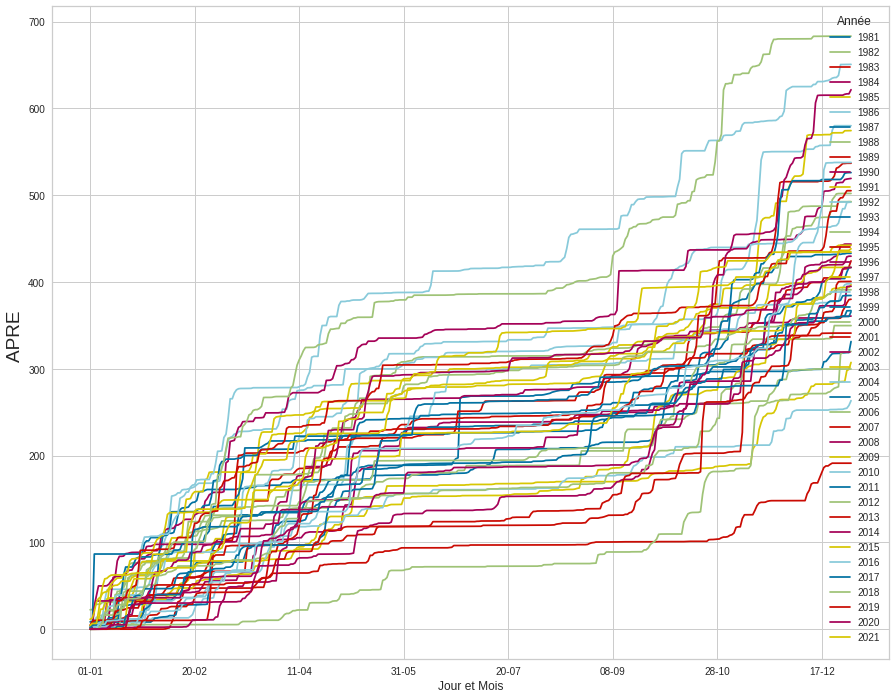

In [ ]:
ax = P.T.plot(figsize=(15, 12))
ax.set_ylabel('APRE ', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)


Text(0.5, 0, 'Jour et Mois')

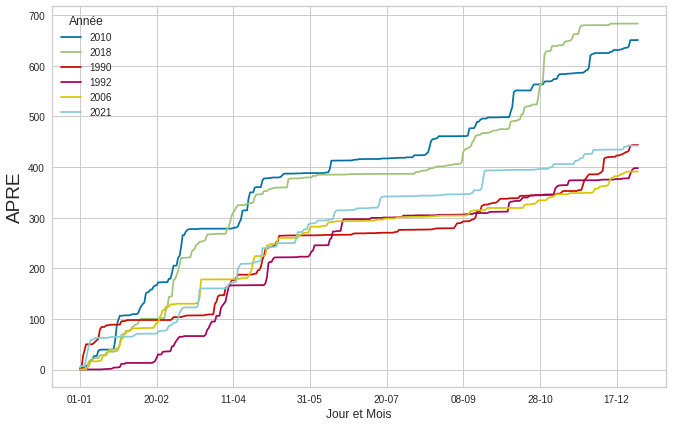

In [ ]:
import matplotlib as plt
ax =P.loc[[ 2010, 2018,1990, 1992, 2006, 2021]].T.plot(figsize=(11, 7))
ax.set_ylabel('APRE', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)

### min max

In [ ]:
from sklearn.preprocessing import StandardScaler
Pnorm = (P-min(P.min()))/(max(P.max())-min(P.min()))
#col = T.columns
#Tnorm = scaler.fit_transform(T)
#Tnorm= pd.DataFrame(Tnorm,columns=col)

pd.set_option('max_columns', 10)
Pnorm.head()

Jour-Mois     01-01     02-01     03-01     04-01     05-01  ...     27-12  \
Année                                                        ...             
1981       0.000029  0.000029  0.000029  0.000029  0.000717  ...  0.465831   
1982       0.000980  0.000980  0.000980  0.000980  0.000980  ...  0.734679   
1983       0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.279867   
1984       0.000015  0.000146  0.000249  0.011107  0.011429  ...  0.527482   
1985       0.000000  0.000000  0.000000  0.000000  0.000995  ...  0.417584   

Jour-Mois     28-12     29-12     30-12     31-12  
Année                                              
1981       0.466167  0.466401  0.466401  0.485030  
1982       0.734679  0.734679  0.734679  0.734679  
1983       0.279867  0.279867  0.279867  0.279867  
1984       0.527614  0.527701  0.527848  0.527921  
1985       0.417789  0.436007  0.438173  0.449748  

[5 rows x 365 columns]

In [ ]:
#Pnorm= (P-P.min())/(P.max()-P.min())
#Pnorm.head()

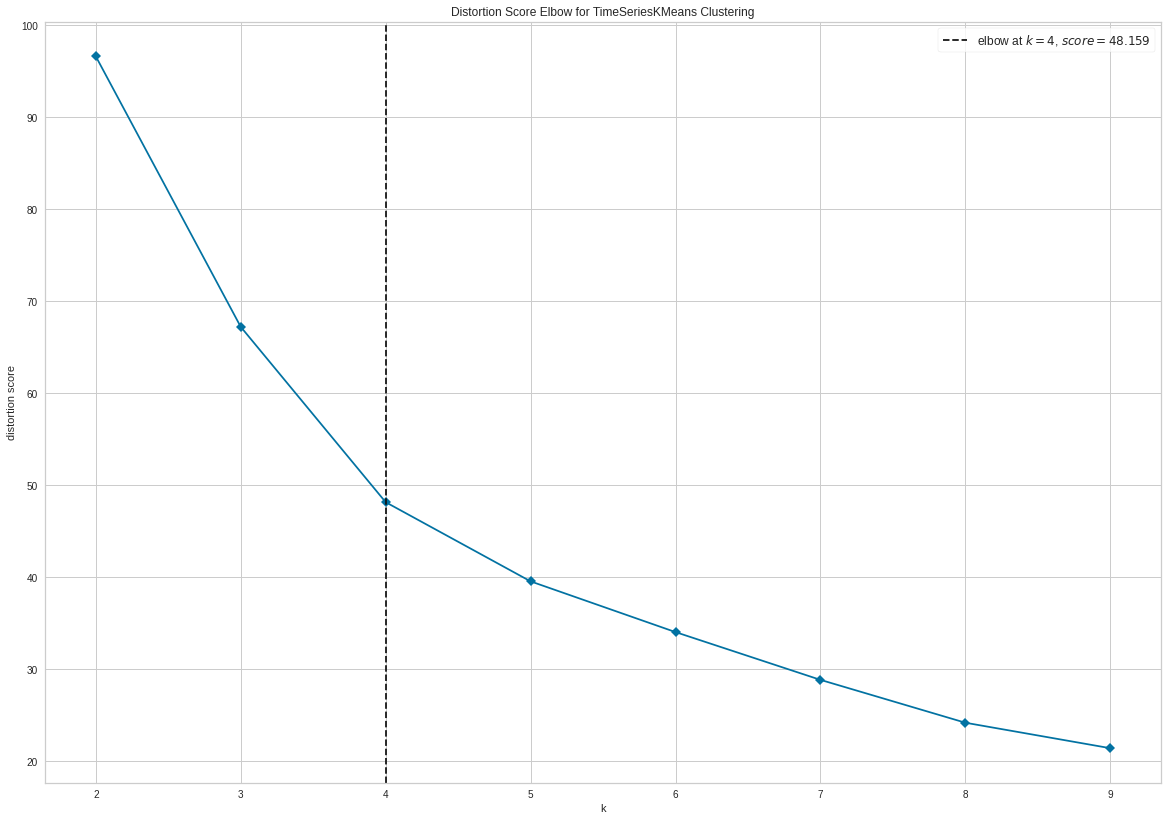

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":   10}
visualizerP=kelbow_visualizer(TimeSeriesKMeans(random_state=28, metric='dtw', metric_params=metric_params), Pnorm, k=(2,10),locate_elbow=True,timings=False)
num_KP= visualizerP.elbow_value_


In [ ]:
# On choisit la distance DTW et on fixe 'r' à 10
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
# sakoe_chiba_radius=None, itakura_max_slope=None
models = tslearn.clustering.TimeSeriesKMeans(n_clusters=4, metric='dtw',random_state=28, metric_params=metric_params)
predictionsP = models.fit_predict(Pnorm)
print(predictionsP)


[2 0 1 2 1 0 2 2 2 0 0 0 2 2 2 0 2 1 2 1 1 2 0 0 2 0 2 2 2 3 2 2 0 2 0 2 2
 3 1 0 0]


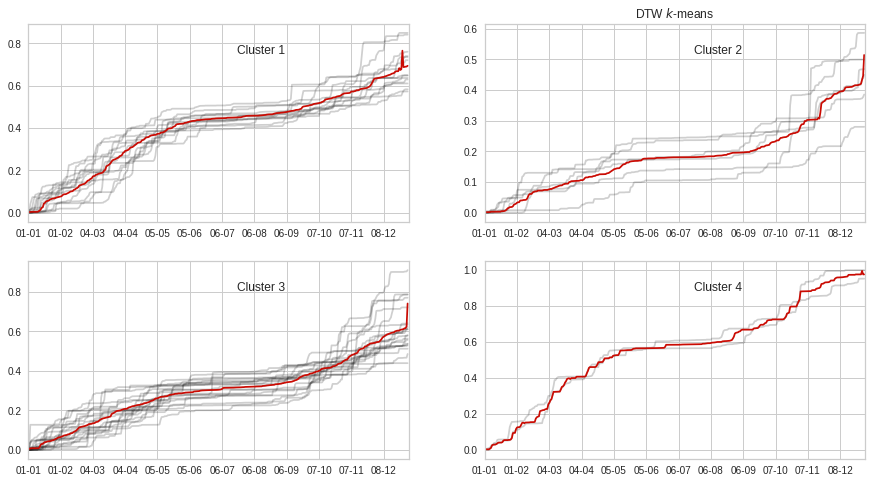

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
X_train = Pnorm.values
for yi in range(4):
    plt.subplot(2, 2, yi + 1)
    for xx in X_train[predictionsP == yi]:
        _index = P.columns.values
        n_indices = _index.shape[0]
        _index = [_index[i] for i in range(n_indices) if i%31==0 ]
        plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.xticks(ticks = [i for i in range(n_indices) if  i%31==0], labels = _index)
    plt.plot(models.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train.shape[1])
    # plt.ylim(-10, 10)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")


In [ ]:
P["cluster"] = predictionsP
P.head()

Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...   28-12   29-12   30-12  \
Année                                         ...                           
1981        0.02   0.02   0.02   0.02   0.49  ...  318.56  318.72  318.72   
1982        0.67   0.67   0.67   0.67   0.67  ...  502.05  502.05  502.05   
1983        0.00   0.00   0.00   0.00   0.00  ...  191.25  191.25  191.25   
1984        0.01   0.10   0.17   7.59   7.81  ...  360.55  360.61  360.71   
1985        0.00   0.00   0.00   0.00   0.68  ...  285.50  297.95  299.43   

Jour-Mois   31-12  cluster  
Année                       
1981       331.45        2  
1982       502.05        0  
1983       191.25        1  
1984       360.76        2  
1985       307.34        1  

[5 rows x 366 columns]

In [ ]:
#T2=pd.DataFrame(T)
#T2=T.copy(deep=True)
P.insert(0, "Date", P.index)
P.head()

Jour-Mois  Date  01-01  02-01  03-01  04-01  ...   28-12   29-12   30-12  \
Année                                        ...                           
1981       1981   0.02   0.02   0.02   0.02  ...  318.56  318.72  318.72   
1982       1982   0.67   0.67   0.67   0.67  ...  502.05  502.05  502.05   
1983       1983   0.00   0.00   0.00   0.00  ...  191.25  191.25  191.25   
1984       1984   0.01   0.10   0.17   7.59  ...  360.55  360.61  360.71   
1985       1985   0.00   0.00   0.00   0.00  ...  285.50  297.95  299.43   

Jour-Mois   31-12  cluster  
Année                       
1981       331.45        2  
1982       502.05        0  
1983       191.25        1  
1984       360.76        2  
1985       307.34        1  

[5 rows x 367 columns]

In [ ]:
P_melted = pd.melt(P, id_vars =  ["Date", "cluster"], value_name="APRE")
P_melted.reset_index(inplace=True, drop = True)

In [ ]:
P_melted

Date  cluster Jour-Mois    APRE
0      1981        2     01-01    0.02
1      1982        0     01-01    0.67
2      1983        1     01-01    0.00
3      1984        2     01-01    0.01
4      1985        1     01-01    0.00
...     ...      ...       ...     ...
14960  2017        2     31-12  384.46
14961  2018        3     31-12  683.36
14962  2019        1     31-12  341.16
14963  2020        0     31-12  429.77
14964  2021        0     31-12  442.40

[14965 rows x 4 columns]

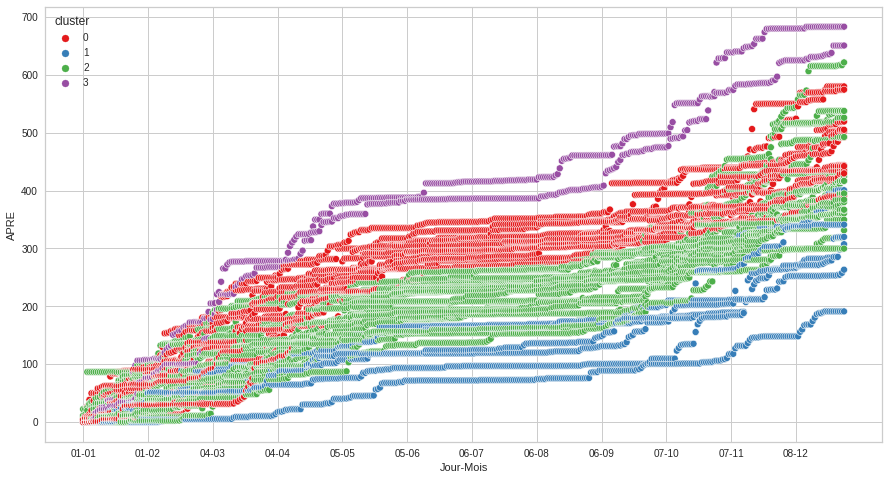

In [ ]:
import seaborn as sns
_index = Pnorm.columns.values
n_indices = _index.shape[0]
_index = [_index[i] for i in range(n_indices) if i%31==0 ]
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "Jour-Mois", y = "APRE", hue = "cluster", data = P_melted,palette="Set1")
#flatui = ["#9b59b6", "#3498db", "orange"]
# sns.set_palette(flatui)
plt.xticks(ticks = [i for i in range(n_indices) if  i%31==0], labels = _index)
plt.show()


In [ ]:
print('Cluster 1 :', list(P[P.cluster == 0].index))
print('Cluster 2 :', list(P[P.cluster == 1].index))
print('Cluster 3 :', list(P[P.cluster == 2].index))
print('Cluster 4 :', list(P[P.cluster == 3].index))
print('Cluster 5 :', list(P[P.cluster == 4].index))


Cluster 1 : [1982, 1986, 1990, 1991, 1992, 1996, 2003, 2004, 2006, 2013, 2015, 2020, 2021]
Cluster 2 : [1983, 1985, 1998, 2000, 2001, 2019]
Cluster 3 : [1981, 1984, 1987, 1988, 1989, 1993, 1994, 1995, 1997, 1999, 2002, 2005, 2007, 2008, 2009, 2011, 2012, 2014, 2016, 2017]
Cluster 4 : [2010, 2018]
Cluster 5 : []


### **QUALITY**

**Silhouette score:** 

In [ ]:
P= df.pivot_table(index="Année", columns="Jour-Mois", values="APRE")[cols[:-1]]
P.head()


Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...   27-12   28-12   29-12  \
Année                                         ...                           
1981        0.02   0.02   0.02   0.02   0.49  ...  318.33  318.56  318.72   
1982        0.67   0.67   0.67   0.67   0.67  ...  502.05  502.05  502.05   
1983        0.00   0.00   0.00   0.00   0.00  ...  191.25  191.25  191.25   
1984        0.01   0.10   0.17   7.59   7.81  ...  360.46  360.55  360.61   
1985        0.00   0.00   0.00   0.00   0.68  ...  285.36  285.50  297.95   

Jour-Mois   30-12   31-12  
Année                      
1981       318.72  331.45  
1982       502.05  502.05  
1983       191.25  191.25  
1984       360.71  360.76  
1985       299.43  307.34  

[5 rows x 365 columns]

In [ ]:
import sklearn
#from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
tslearn.clustering.silhouette_score(Pnorm,predictionsP, metric="dtw",random_state=0, metric_params=metric_params) 

0.35063861638968724

**Calinski-Harabasz Index :  the Variance Ratio Criterion.**

**The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion**

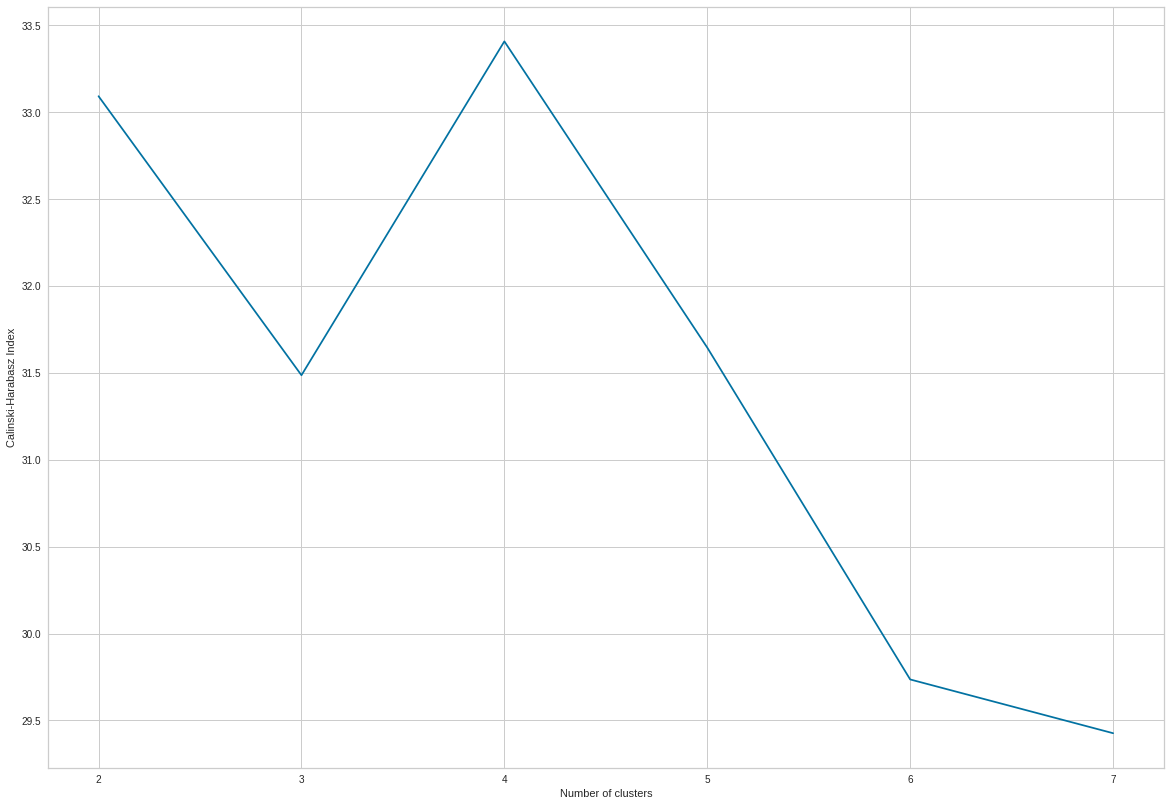

In [ ]:
from sklearn.metrics import calinski_harabasz_score
results = {}

for i in range(2,8):
    metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
    TimeSeriesKMean =  tslearn.clustering.TimeSeriesKMeans(n_clusters=i, metric='dtw',random_state=28, metric_params=metric_params)
    labels = TimeSeriesKMean.fit_predict(Pnorm)
    db_index = calinski_harabasz_score(Pnorm, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [ ]:
labels

array([4, 0, 6, 2, 1, 0, 4, 1, 2, 0, 0, 2, 2, 4, 4, 0, 1, 1, 4, 6, 1, 2,
       0, 0, 4, 0, 2, 5, 4, 3, 2, 5, 0, 1, 0, 2, 4, 3, 1, 0, 0])

In [ ]:
sklearn.metrics.calinski_harabasz_score(T, T["cluster"])

77.04838933531856

### means

In [ ]:
P= df.pivot_table(index="Année", columns="Jour-Mois", values="APRE")[cols[:-1]]
P.head()


Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...   27-12   28-12   29-12  \
Année                                         ...                           
1981        0.02   0.02   0.02   0.02   0.49  ...  318.33  318.56  318.72   
1982        0.67   0.67   0.67   0.67   0.67  ...  502.05  502.05  502.05   
1983        0.00   0.00   0.00   0.00   0.00  ...  191.25  191.25  191.25   
1984        0.01   0.10   0.17   7.59   7.81  ...  360.46  360.55  360.61   
1985        0.00   0.00   0.00   0.00   0.68  ...  285.36  285.50  297.95   

Jour-Mois   30-12   31-12  
Année                      
1981       318.72  331.45  
1982       502.05  502.05  
1983       191.25  191.25  
1984       360.71  360.76  
1985       299.43  307.34  

[5 rows x 365 columns]

In [ ]:
P["cluster"] = predictionsP
P.head()
pd.set_option('max_columns', 6)

Pcarac = {i: P[P.cluster == i] for i in P.cluster}
for i in P.cluster :
    Pcarac[i]['Max']=Pcarac[i].iloc[:, 0:365].max(axis=1)  
Pcarac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{0: Jour-Mois  01-01  02-01  03-01  ...   31-12  cluster     Max
 Année                           ...                         
 1982        0.67   0.67   0.67  ...  502.05        0  502.05
 1986        3.93   5.82   9.77  ...  580.12        0  580.12
 1990        1.44   1.78  27.02  ...  443.73        0  443.73
 1991        0.01   0.21   0.21  ...  416.88        0  416.88
 1992        0.00   0.00   0.00  ...  397.89        0  397.89
 1996        0.39   0.44   0.44  ...  519.38        0  519.38
 2003        0.00   0.00   0.00  ...  574.49        0  574.49
 2004        0.48   1.86   2.53  ...  492.08        0  492.08
 2006        0.16   0.28   0.32  ...  391.08        0  391.08
 2013        4.48   8.73   9.85  ...  505.23        0  505.23
 2015        0.00   0.00   0.00  ...  434.68        0  434.68
 2020        0.00   0.00   0.00  ...  429.77        0  429.77
 2021        4.23   6.61   6.65  ...  442.40        0  442.40
 
 [13 rows x 367 columns],
 1: Jour-Mois  01-01  02-01  03-01  ...

In [ ]:
APRE_means=[]
for i in P.cluster:
    APRE_means.append(Pcarac[i][['Max']].mean(axis=0).item())

In [ ]:
APRE_means=pd.DataFrame(APRE_means,columns = ['La moyenne de l\'APRE pour chaque cluster'],index=P.index)
APRE_means=APRE_means.join(P[["cluster"]])
APRE_means

La moyenne de l'APRE pour chaque cluster  cluster
Année                                                   
1981                                 423.772500        2
1982                                 471.521538        0
1983                                 303.960000        1
1984                                 423.772500        2
1985                                 303.960000        1
1986                                 471.521538        0
1987                                 423.772500        2
1988                                 423.772500        2
1989                                 423.772500        2
1990                                 471.521538        0
1991                                 471.521538        0
1992                                 471.521538        0
1993                                 423.772500        2
1994                                 423.772500        2
1995                                 423.772500        2
1996                                 471.521538        0
1997                                 423.772500        2
1998                                 303.960000        1
1999                                 423.772500        2
2000                                 303.960000        1
2001                                 303.960000        1
2002                                 423.772500        2
2003                                 471.521538        0
2004                                 471.521538        0
2005                                 423.772500        2
2006                                 471.521538        0
2007                                 423.772500        2
2008                                 423.772500        2
2009                                 423.772500        2
2010                                 667.090000        3
2011                                 423.772500        2
2012                                 423.772500        2
2013                                 471.521538        0
2014                                 423.772500        2
2015                                 471.521538        0
2016                                 423.772500        2
2017                                 423.772500        2
2018                                 667.090000        3
2019                                 303.960000        1
2020                                 471.521538        0
2021                                 471.521538        0

## for vitesse de vent

In [ ]:
V= df.pivot_table(index="Année", columns="Jour-Mois", values="WS10M")[cols[:-1]]
V.head()

Jour-Mois  01-01  02-01  03-01  ...  29-12  30-12  31-12
Année                           ...                     
1981        3.84   2.78   2.70  ...   5.88   7.36   5.87
1982        3.83   3.58   3.64  ...   2.20   3.24   3.48
1983        2.97   2.55   3.43  ...   4.03   2.81   2.93
1984        2.27   1.38   3.91  ...   4.25   3.70   1.59
1985        2.41   3.91   3.71  ...   6.27   5.44   7.93

[5 rows x 365 columns]

In [ ]:
V.isnull().sum().sum()

0

In [ ]:
#d=d.reset_index()

### Visualisation

Text(0.5, 0, 'Day and month')

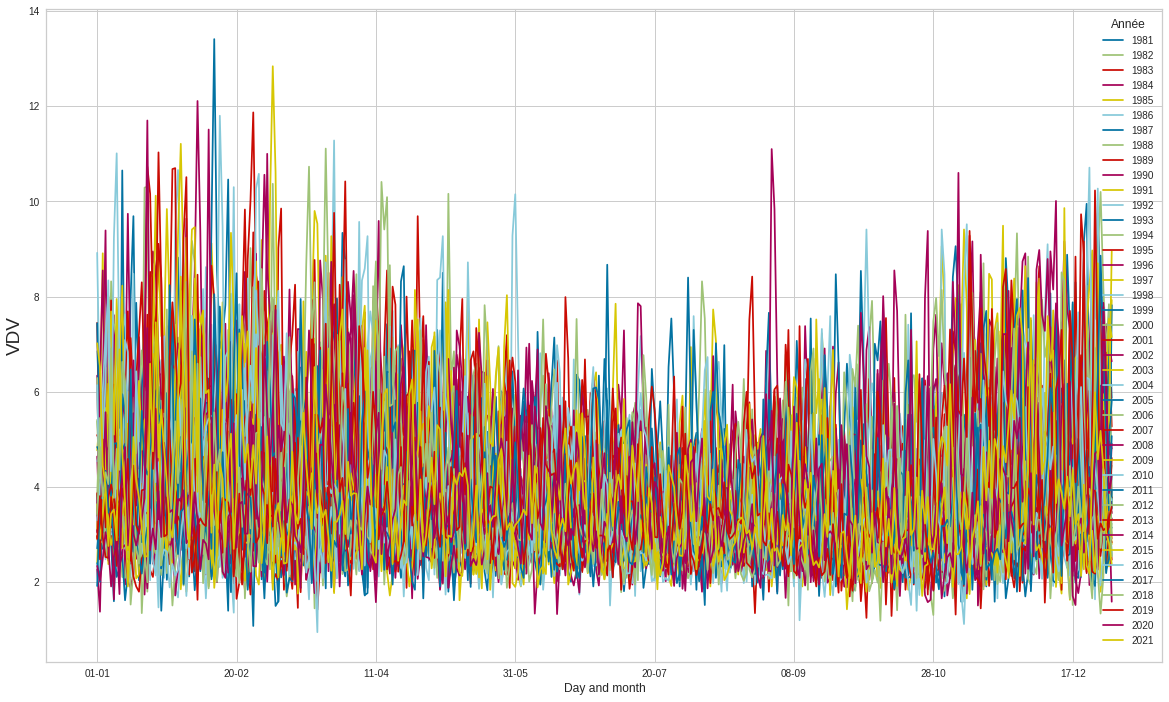

In [ ]:
ax = V.T.plot(figsize=(20, 12))
ax.set_ylabel('VDV', fontsize=19)
ax.set_xlabel('Day and month', fontsize=12)


Text(0.5, 0, 'Jour et Mois')

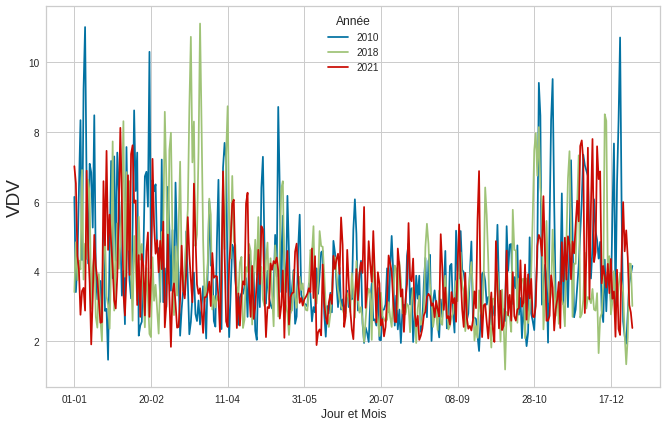

In [ ]:
import matplotlib as plt
ax =V.loc[[ 2010, 2018,2021]].T.plot(figsize=(11, 7))
ax.set_ylabel('VDV', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)

Text(0.5, 0, 'Jour et Mois')

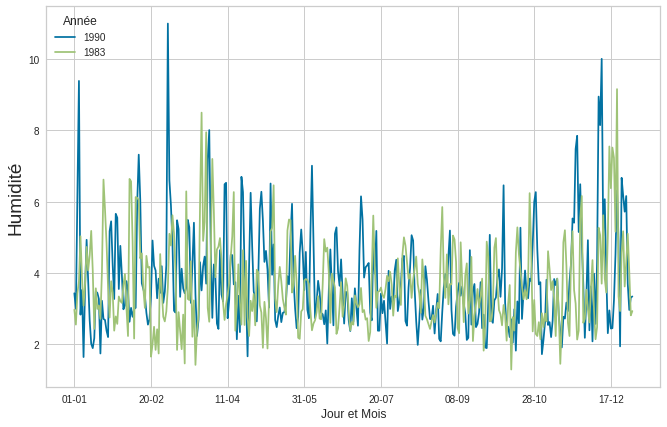

In [ ]:
import matplotlib as plt
ax =V.loc[[ 1990, 1983]].T.plot(figsize=(11, 7))
ax.set_ylabel('Humidité', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)

### Min max

In [ ]:
pd.set_option('max_columns',10)
V= df.pivot_table(index="Année", columns="Jour-Mois", values="WS10M")[cols[:-1]]
V.head()

Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  27-12  28-12  29-12  30-12  \
Année                                         ...                               
1981        3.84   2.78   2.70   4.91   4.12  ...   5.77   7.80   5.88   7.36   
1982        3.83   3.58   3.64   2.70   2.74  ...   3.23   3.16   2.20   3.24   
1983        2.97   2.55   3.43   3.77   5.03  ...   4.29   5.10   4.03   2.81   
1984        2.27   1.38   3.91   6.05   3.88  ...   7.48   4.32   4.25   3.70   
1985        2.41   3.91   3.71   3.21   7.70  ...   2.99   5.49   6.27   5.44   

Jour-Mois  31-12  
Année             
1981        5.87  
1982        3.48  
1983        2.93  
1984        1.59  
1985        7.93  

[5 rows x 365 columns]

In [ ]:

Vnorm = (V-min(V.min()))/(max(V.max())-min(V.min()))
#col = T.columns
#Tnorm = scaler.fit_transform(T)
#Tnorm= pd.DataFrame(Tnorm,columns=col)

pd.set_option('max_columns', 10)
Vnorm.head()

Jour-Mois     01-01     02-01     03-01     04-01     05-01  ...     27-12  \
Année                                                        ...             
1981       0.231942  0.146870  0.140449  0.317817  0.254414  ...  0.386838   
1982       0.231140  0.211075  0.215891  0.140449  0.143660  ...  0.182986   
1983       0.162119  0.128411  0.199037  0.226324  0.327448  ...  0.268058   
1984       0.105939  0.034510  0.237560  0.409310  0.235152  ...  0.524077   
1985       0.117175  0.237560  0.221509  0.181380  0.541734  ...  0.163724   

Jour-Mois     28-12     29-12     30-12     31-12  
Année                                              
1981       0.549759  0.395666  0.514446  0.394864  
1982       0.177368  0.100321  0.183788  0.203050  
1983       0.333066  0.247191  0.149278  0.158909  
1984       0.270465  0.264848  0.220706  0.051364  
1985       0.364366  0.426966  0.360353  0.560193  

[5 rows x 365 columns]

In [ ]:
#Vnorm= (V-V.min())/(V.max()-V.min())
#Vnorm.head()

### Clustering

### Kelbow

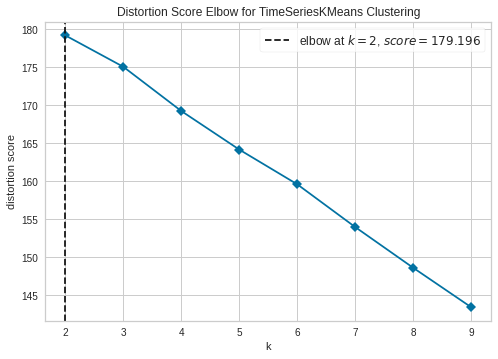

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":   10}
visualizerV=kelbow_visualizer(TimeSeriesKMeans(random_state=0, metric='dtw', metric_params=metric_params), Vnorm, k=(2,10),locate_elbow=True,timings=False)
num_KV= visualizerV.elbow_value_


In [ ]:
 # On choisit la distance DTW et on fixe 'k' à 2
models = TimeSeriesKMeans(n_clusters=2, metric="dtw",random_state=42)
predictionsV = models.fit_predict(Vnorm)
print(predictionsV)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1]


In [ ]:
V["Vid_timeseriesclustering"]=models.labels_

In [ ]:
print('Cluster 1 :', list(V[V.Vid_timeseriesclustering == 0].index))
print('Cluster 2 :', list(V[V.Vid_timeseriesclustering == 1].index))
print('Cluster 3 :', list(V[V.Vid_timeseriesclustering == 2].index))



Cluster 1 : [2009, 2010, 2019]
Cluster 2 : [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2021]
Cluster 3 : []


In [ ]:
import matplotlib.pyplot as plt


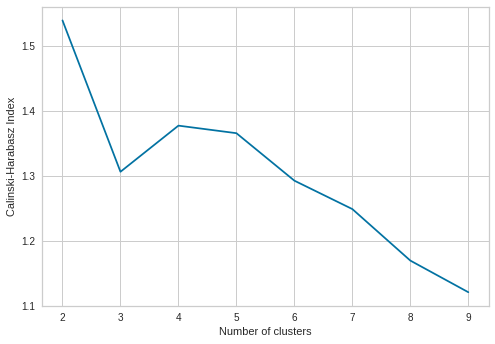

In [ ]:
from sklearn.metrics import calinski_harabasz_score
results = {}

for i in range(2,10):
    metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
    TimeSeriesKMean =  tslearn.clustering.TimeSeriesKMeans(n_clusters=i, metric='dtw',random_state=20, metric_params=metric_params)
    labels = TimeSeriesKMean.fit_predict(Vnorm)
    db_index = calinski_harabasz_score(Vnorm, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.calinski_harabasz_score(T, T["cluster"])


77.05973880702295

In [ ]:
Vcarac = {i: V[V.Vid_timeseriesclustering == i] for i in V.Vid_timeseriesclustering}
for i in V.Vid_timeseriesclustering :
    Vcarac[i]['Mean']=Vcarac[i].iloc[:, 0:366].mean(axis=1)  
Vcarac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{0: Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  29-12  30-12  31-12  \
 Année                                         ...                        
 2009        3.12   4.30   5.59   5.66   2.38  ...   5.02   5.40   8.95   
 2010        6.14   3.41   4.26   6.38   8.34  ...   3.66   3.91   4.16   
 2019        2.91   3.81   2.94   2.53   2.51  ...   3.14   3.34   3.58   
 
 Jour-Mois  Vid_timeseriesclustering      Mean  
 Année                                          
 2009                              0  4.121066  
 2010                              0  4.034918  
 2019                              0  3.994617  
 
 [3 rows x 367 columns],
 1: Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  29-12  30-12  31-12  \
 Année                                         ...                        
 1981        3.84   2.78   2.70   4.91   4.12  ...   5.88   7.36   5.87   
 1982        3.83   3.58   3.64   2.70   2.74  ...   2.20   3.24   3.48   
 1983        2.97   2.55   3.43   3.77   5.03

In [ ]:
V_means=[]
for i in V.Vid_timeseriesclustering:
    V_means.append(Vcarac[i][['Mean']].mean(axis=0).item())

In [ ]:
V_means=pd.DataFrame(V_means,columns = ['The mean of V for each class'],index=V.index)
V_means.head()

The mean of V for each class
Année                              
1981                        3.85274
1982                        3.85274
1983                        3.85274
1984                        3.85274
1985                        3.85274

## **For Humidité**

In [ ]:
H= df.pivot_table(index="Année", columns="Jour-Mois", values="QV2M")[cols[:-1]]
H.head()

Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  27-12  28-12  29-12  30-12  \
Année                                         ...                               
1981        4.88   4.70   4.88   5.37   6.04  ...   6.77   7.26   7.69   6.84   
1982        7.08   6.16   5.31   4.94   6.10  ...   6.16   5.55   5.98   5.86   
1983        4.58   5.55   4.58   3.91   3.85  ...   7.14   5.80   4.64   4.39   
1984        7.02   7.51   6.84   6.53   4.52  ...   5.80   5.43   5.31   4.58   
1985        4.76   5.25   5.00   4.76   6.47  ...   6.29   6.23   6.35   6.10   

Jour-Mois  31-12  
Année             
1981        7.51  
1982        4.88  
1983        6.47  
1984        4.39  
1985        5.98  

[5 rows x 365 columns]

### Visualisation

Text(0.5, 0, 'Jour et Mois')

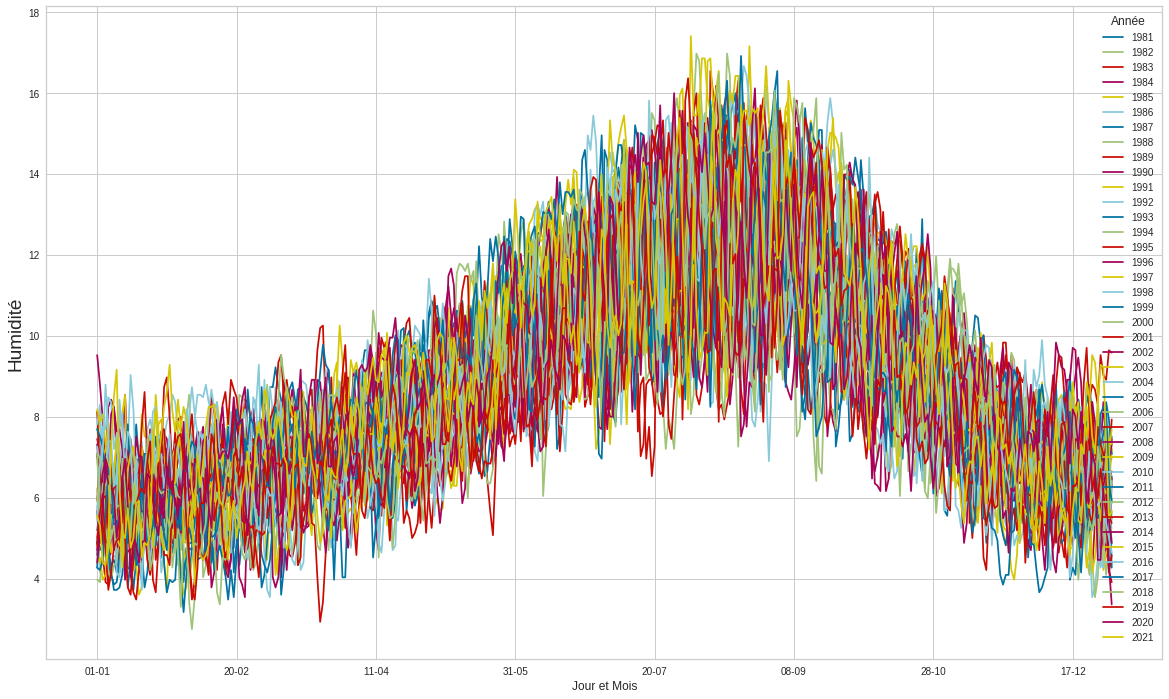

In [ ]:

ax = H.T.plot(figsize=(20, 12))
ax.set_ylabel('Humidité', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)


In [ ]:
import matplotlib as plt

Text(0.5, 0, 'Jour et Mois')

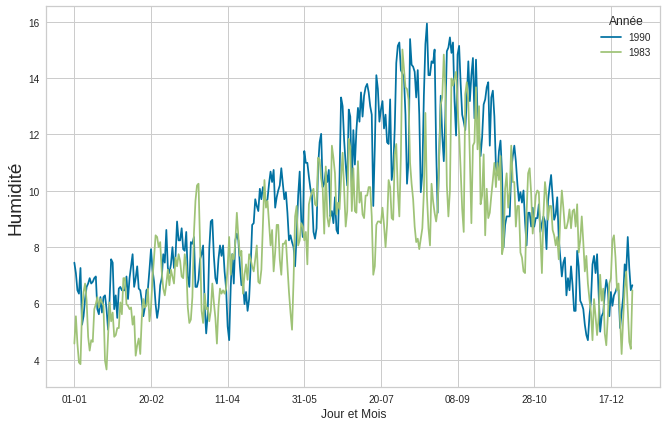

In [ ]:
import matplotlib as plt
ax =H.loc[[ 1990, 1983]].T.plot(figsize=(11, 7))
ax.set_ylabel('Humidité', fontsize=19)
ax.set_xlabel('Jour et Mois', fontsize=12)

### Min max

In [ ]:
from sklearn.preprocessing import StandardScaler
Hnorm = (H-min(H.min()))/(max(H.max())-min(H.min()))
#col = T.columns
#Tnorm = scaler.fit_transform(T)
#Tnorm= pd.DataFrame(Tnorm,columns=col)

pd.set_option('max_columns', 10)
Hnorm.head()

Jour-Mois     01-01     02-01     03-01     04-01     05-01  ...     27-12  \
Année                                                        ...             
1981       0.145392  0.133106  0.145392  0.178840  0.224573  ...  0.274403   
1982       0.295563  0.232765  0.174744  0.149488  0.228669  ...  0.232765   
1983       0.124915  0.191126  0.124915  0.079181  0.075085  ...  0.299659   
1984       0.291468  0.324915  0.279181  0.258020  0.120819  ...  0.208191   
1985       0.137201  0.170648  0.153584  0.137201  0.253925  ...  0.241638   

Jour-Mois     28-12     29-12     30-12     31-12  
Année                                              
1981       0.307850  0.337201  0.279181  0.324915  
1982       0.191126  0.220478  0.212287  0.145392  
1983       0.208191  0.129010  0.111945  0.253925  
1984       0.182935  0.174744  0.124915  0.111945  
1985       0.237543  0.245734  0.228669  0.220478  

[5 rows x 365 columns]

In [ ]:
#Hnorm= (H-H.min())/(H.max()-H.min())
#Hnorm.head()

### Kelbow

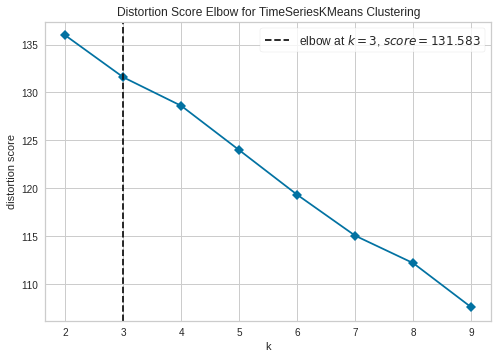

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":   10}

visualizerH=kelbow_visualizer(TimeSeriesKMeans(random_state=9, metric='dtw', metric_params=metric_params), Hnorm, k=(2,10),locate_elbow=True,timings=False)
num_KH= visualizerH.elbow_value_


### calulating KMEANS


In [ ]:
# On choisit la distance DTW et on fixe 'r' à 10
 # On choisit la distance DTW et on fixe 'k' à 2
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}

models = TimeSeriesKMeans(n_clusters=3, metric='dtw',random_state=9, metric_params=metric_params)
predictionsH = models.fit_predict(Hnorm)
predictionsH


array([0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2])

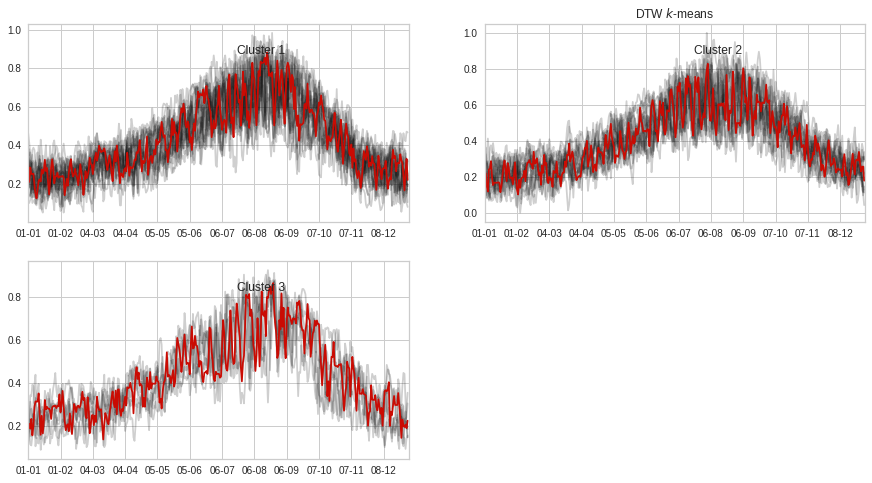

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
X_train = Hnorm.values
for yi in range(3):
    plt.subplot(2, 2, yi + 1)
    for xx in X_train[predictionsH == yi]:
        _index = P.columns.values
        n_indices = _index.shape[0]
        _index = [_index[i] for i in range(n_indices) if i%31==0 ]
        plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.xticks(ticks = [i for i in range(n_indices) if  i%31==0], labels = _index)
    plt.plot(models.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train.shape[1])
    # plt.ylim(-10, 10)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")


In [ ]:
H["cluster"] = predictionsH
H.head()

Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  28-12  29-12  30-12  31-12  \
Année                                         ...                               
1981        4.88   4.70   4.88   5.37   6.04  ...   7.26   7.69   6.84   7.51   
1982        7.08   6.16   5.31   4.94   6.10  ...   5.55   5.98   5.86   4.88   
1983        4.58   5.55   4.58   3.91   3.85  ...   5.80   4.64   4.39   6.47   
1984        7.02   7.51   6.84   6.53   4.52  ...   5.43   5.31   4.58   4.39   
1985        4.76   5.25   5.00   4.76   6.47  ...   6.23   6.35   6.10   5.98   

Jour-Mois  cluster  
Année               
1981             0  
1982             2  
1983             1  
1984             1  
1985             1  

[5 rows x 366 columns]

In [ ]:
#T2=pd.DataFrame(T)
#T2=T.copy(deep=True)
H.insert(0, "Date", H.index)
H.head()

Jour-Mois  Date  01-01  02-01  03-01  04-01  ...  28-12  29-12  30-12  31-12  \
Année                                        ...                               
1981       1981   4.88   4.70   4.88   5.37  ...   7.26   7.69   6.84   7.51   
1982       1982   7.08   6.16   5.31   4.94  ...   5.55   5.98   5.86   4.88   
1983       1983   4.58   5.55   4.58   3.91  ...   5.80   4.64   4.39   6.47   
1984       1984   7.02   7.51   6.84   6.53  ...   5.43   5.31   4.58   4.39   
1985       1985   4.76   5.25   5.00   4.76  ...   6.23   6.35   6.10   5.98   

Jour-Mois  cluster  
Année               
1981             0  
1982             2  
1983             1  
1984             1  
1985             1  

[5 rows x 367 columns]

In [ ]:
H_melted = pd.melt(H, id_vars =  ["Date", "cluster"], value_name="QV2M")
H_melted.reset_index(inplace=True, drop = True)

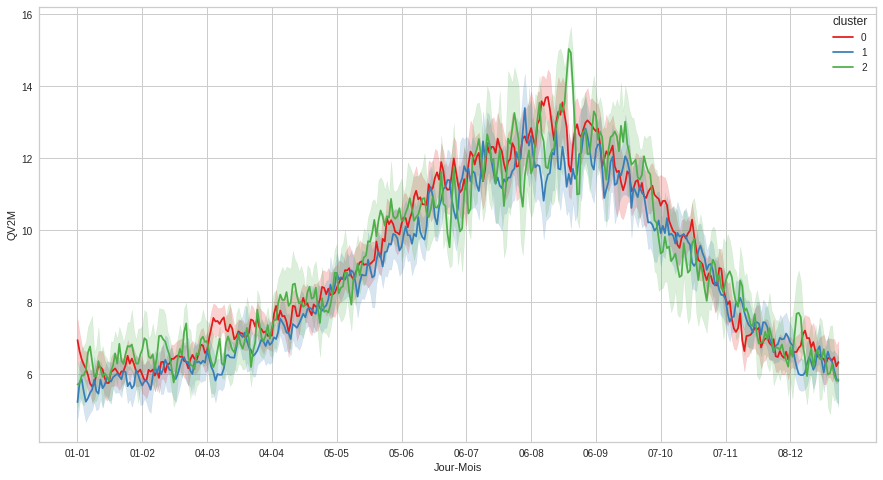

In [ ]:
import seaborn as sns
_index = Hnorm.columns.values
n_indices = _index.shape[0]
_index = [_index[i] for i in range(n_indices) if i%31==0 ]
plt.figure(figsize = (15, 8))
sns.lineplot(x = "Jour-Mois", y = "QV2M", hue = "cluster", data = H_melted, palette="Set1")
flatui = ["#9b59b6", "#3498db", "orange"]
# sns.set_palette(flatui)
plt.xticks(ticks = [i for i in range(n_indices) if  i%31==0], labels = _index)
plt.show()


In [ ]:
print('Cluster 1 :', list(H[H.cluster == 0].index))
print('Cluster 2 :', list(H[H.cluster == 1].index))
print('Cluster 3 :', list(H[H.cluster == 2].index))
print('Cluster 4 :', list(H[H.cluster == 3].index))
print('Cluster 5 :', list(P[P.cluster == 4].index))


Cluster 1 : [1981, 1987, 1990, 1991, 1994, 1995, 1996, 1999, 2001, 2002, 2003, 2004, 2006, 2009, 2010, 2011, 2013, 2017, 2018]
Cluster 2 : [1983, 1984, 1985, 1986, 1992, 1993, 2000, 2005, 2007, 2008, 2012, 2014, 2015, 2016, 2019]
Cluster 3 : [1982, 1988, 1989, 1997, 1998, 2020, 2021]
Cluster 4 : []
Cluster 5 : []


###**Metrics for clustering validation** 

**Silhouette score:** 

In [ ]:
H= df.pivot_table(index="Année", columns="Jour-Mois", values="QV2M")[cols[:-1]]
H.head()


Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  27-12  28-12  29-12  30-12  \
Année                                         ...                               
1981        4.88   4.70   4.88   5.37   6.04  ...   6.77   7.26   7.69   6.84   
1982        7.08   6.16   5.31   4.94   6.10  ...   6.16   5.55   5.98   5.86   
1983        4.58   5.55   4.58   3.91   3.85  ...   7.14   5.80   4.64   4.39   
1984        7.02   7.51   6.84   6.53   4.52  ...   5.80   5.43   5.31   4.58   
1985        4.76   5.25   5.00   4.76   6.47  ...   6.29   6.23   6.35   6.10   

Jour-Mois  31-12  
Année             
1981        7.51  
1982        4.88  
1983        6.47  
1984        4.39  
1985        5.98  

[5 rows x 365 columns]

In [ ]:
import sklearn
#from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw

In [ ]:
metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
tslearn.clustering.silhouette_score(Hnorm,predictionsH, metric="dtw",random_state=9, metric_params=metric_params) 

0.010216231437721705

**Calinski-Harabasz Index :  the Variance Ratio Criterion.**

**The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion**

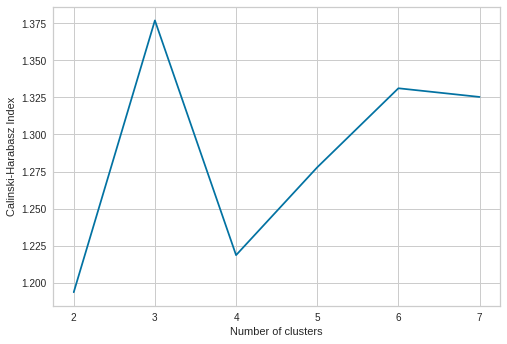

In [ ]:
results = {}

for i in range(2,8):
    metric_params = {"global_constraint":"sakoe_chiba", "sakoe_chiba_radius": 10}
    TimeSeriesKMean =  tslearn.clustering.TimeSeriesKMeans(n_clusters=i, metric='dtw',random_state=42, metric_params=metric_params)
    labels = TimeSeriesKMean.fit_predict(Hnorm)
    db_index = calinski_harabasz_score(Hnorm, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

### Means

In [ ]:
H= df.pivot_table(index="Année", columns="Jour-Mois", values="QV2M")[cols[:-1]]
H.head()

Jour-Mois  01-01  02-01  03-01  04-01  05-01  ...  27-12  28-12  29-12  30-12  \
Année                                         ...                               
1981        4.88   4.70   4.88   5.37   6.04  ...   6.77   7.26   7.69   6.84   
1982        7.08   6.16   5.31   4.94   6.10  ...   6.16   5.55   5.98   5.86   
1983        4.58   5.55   4.58   3.91   3.85  ...   7.14   5.80   4.64   4.39   
1984        7.02   7.51   6.84   6.53   4.52  ...   5.80   5.43   5.31   4.58   
1985        4.76   5.25   5.00   4.76   6.47  ...   6.29   6.23   6.35   6.10   

Jour-Mois  31-12  
Année             
1981        7.51  
1982        4.88  
1983        6.47  
1984        4.39  
1985        5.98  

[5 rows x 365 columns]

In [ ]:
H["cluster"] = predictionsH
pd.set_option('max_columns',6)
Hcarac = {i: H[H.cluster == i] for i in H.cluster}
for i in H.cluster :
    Hcarac[i]['Mean']=Hcarac[i].iloc[:, 0:365].mean(axis=1)  
Hcarac


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{0: Jour-Mois  01-01  02-01  03-01  ...  31-12  cluster      Mean
 Année                           ...                          
 1981        4.88   4.70   4.88  ...   7.51        0  8.882438
 1987        5.19   5.74   6.96  ...   6.53        0  9.227616
 1990        7.45   7.08   6.47  ...   6.65        0  9.294877
 1991        8.12   7.75   6.23  ...   5.68        0  8.684082
 1994        7.69   7.14   6.90  ...   7.39        0  8.801726
 1995        8.12   6.53   4.76  ...   9.58        0  8.970247
 1996        9.52   8.79   7.93  ...   6.29        0  8.910603
 1999        5.62   5.43   6.29  ...   4.27        0  8.840849
 2001        5.92   7.14   7.45  ...   6.47        0  8.735178
 2002        7.32   6.29   6.77  ...   7.45        0  8.718959
 2003        5.92   6.59   6.96  ...   7.20        0  9.358877
 2004        7.81   8.30   6.10  ...   5.62        0  9.116466
 2006        6.96   6.16   5.74  ...   5.25        0  9.126521
 2009        8.18   7.87   8.06  ...   7.32        0

In [ ]:
H_means=[]
for i in H.cluster:
    H_means.append(Hcarac[i][['Mean']].mean(axis=0).item())

In [ ]:
H_means=pd.DataFrame(H_means,columns = ['La moyenne de l\'humidité pour chaque cluster'],index=H.index)
H_means=H_means.join(H[["cluster"]])
H_means

La moyenne de l'humidité pour chaque cluster  cluster
Année                                                       
1981                                       9.014192        0
1982                                       9.000254        2
1983                                       8.671742        1
1984                                       8.671742        1
1985                                       8.671742        1
1986                                       8.671742        1
1987                                       9.014192        0
1988                                       9.000254        2
1989                                       9.000254        2
1990                                       9.014192        0
1991                                       9.014192        0
1992                                       8.671742        1
1993                                       8.671742        1
1994                                       9.014192        0
1995                                       9.014192        0
1996                                       9.014192        0
1997                                       9.000254        2
1998                                       9.000254        2
1999                                       9.014192        0
2000                                       8.671742        1
2001                                       9.014192        0
2002                                       9.014192        0
2003                                       9.014192        0
2004                                       9.014192        0
2005                                       8.671742        1
2006                                       9.014192        0
2007                                       8.671742        1
2008                                       8.671742        1
2009                                       9.014192        0
2010                                       9.014192        0
2011                                       9.014192        0
2012                                       8.671742        1
2013                                       9.014192        0
2014                                       8.671742        1
2015                                       8.671742        1
2016                                       8.671742        1
2017                                       9.014192        0
2018                                       9.014192        0
2019                                       8.671742        1
2020                                       9.000254        2
2021                                       9.000254        2

## **Final clustering**

In [ ]:
import matplotlib.pyplot as plt

### Kmeans

In [ ]:
#Final_data=pd.DataFrame(Final_data)
Final_data=pd.DataFrame(agdd_means["La moyenne de l'AGDD pour chaque cluster"])

In [ ]:
Final_data["La moyenne de l'APRE pour chaque cluster"]=APRE_means["La moyenne de l'APRE pour chaque cluster"]
#Final_data["H_timeseriesclustering"]=H_means["The mean of H for each class"]
#Final_data["Vid_timeseriesclustering"]=V_means["The mean of V for each class"]
Final_data

La moyenne de l'AGDD pour chaque cluster  \
Année                                             
1981                                2036.719545   
1982                                2036.719545   
1983                                2276.135000   
1984                                2036.719545   
1985                                2276.135000   
1986                                2036.719545   
1987                                2276.135000   
1988                                2276.135000   
1989                                2424.532308   
1990                                2276.135000   
1991                                2036.719545   
1992                                2036.719545   
1993                                2036.719545   
1994                                2424.532308   
1995                                2276.135000   
1996                                2036.719545   
1997                                2276.135000   
1998                                2276.135000   
1999                                2276.135000   
2000                                2276.135000   
2001                                2424.532308   
2002                                2276.135000   
2003                                2424.532308   
2004                                2276.135000   
2005                                2276.135000   
2006                                2424.532308   
2007                                2036.719545   
2008                                2276.135000   
2009                                2276.135000   
2010                                2276.135000   
2011                                2424.532308   
2012                                2424.532308   
2013                                2036.719545   
2014                                2424.532308   
2015                                2424.532308   
2016                                2424.532308   
2017                                2424.532308   
2018                                2036.719545   
2019                                2276.135000   
2020                                2424.532308   
2021                                2424.532308   

       La moyenne de l'APRE pour chaque cluster  
Année                                            
1981                                 423.772500  
1982                                 471.521538  
1983                                 303.960000  
1984                                 423.772500  
1985                                 303.960000  
1986                                 471.521538  
1987                                 423.772500  
1988                                 423.772500  
1989                                 423.772500  
1990                                 471.521538  
1991                                 471.521538  
1992                                 471.521538  
1993                                 423.772500  
1994                                 423.772500  
1995                                 423.772500  
1996                                 471.521538  
1997                                 423.772500  
1998                                 303.960000  
1999                                 423.772500  
2000                                 303.960000  
2001                                 303.960000  
2002                                 423.772500  
2003                                 471.521538  
2004                                 471.521538  
2005                                 423.772500  
2006                                 471.521538  
2007                                 423.772500  
2008                                 423.772500  
2009                                 423.772500  
2010                                 667.090000  
2011                                 423.772500  
2012                                 423.772500  
2013                                 471.521538  
2014                                 423.772500  
2015         

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = Final_data.columns
dfscaled = scaler.fit_transform(Final_data)
dfscaled = pd.DataFrame(dfscaled,columns=col, index=Final_data.index)
dfscaled

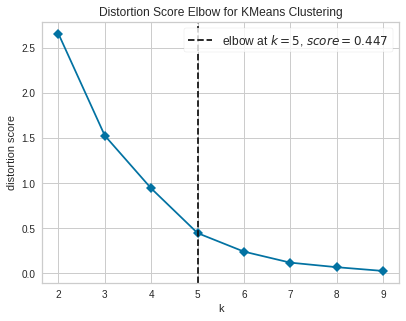

In [ ]:
from sklearn.cluster import KMeans
plt.figure(figsize=(6.4,4.8))
from yellowbrick.cluster.elbow import kelbow_visualizer
visualizer=kelbow_visualizer(KMeans(random_state=10), dfscaled, k=(2,10),locate_elbow=True, timings=False)
NC= visualizer.elbow_value_

In [ ]:
models = KMeans(n_clusters=5,random_state=100)
predictions = models.fit_predict(Final_data)
print(predictions)

[1 1 4 1 4 1 0 0 2 0 1 1 1 2 0 1 0 4 0 4 2 0 2 0 0 2 1 0 0 3 2 2 1 2 2 2 2
 3 4 2 2]


In [ ]:
Final_data["Final_Clustering"]=models.labels_

In [ ]:
print('Cluster 1 :', list(Final_data[Final_data.Final_Clustering == 0].index))
print('Cluster 2 :', list(Final_data[Final_data.Final_Clustering == 1].index))
print('Cluster 3 :', list(Final_data[Final_data.Final_Clustering == 2].index))
print('Cluster 4 :', list(Final_data[Final_data.Final_Clustering == 3].index))
print('Cluster 5 :', list(Final_data[Final_data.Final_Clustering == 4].index))
#print('Cluster 6 :', list(H[H.Hid_timeseriesclustering == 6].index))


Cluster 1 : [1987, 1988, 1990, 1995, 1997, 1999, 2002, 2004, 2005, 2008, 2009]
Cluster 2 : [1981, 1982, 1984, 1986, 1991, 1992, 1993, 1996, 2007, 2013]
Cluster 3 : [1989, 1994, 2001, 2003, 2006, 2011, 2012, 2014, 2015, 2016, 2017, 2020, 2021]
Cluster 4 : [2010, 2018]
Cluster 5 : [1983, 1985, 1998, 2000, 2019]


In [ ]:
Final_data.head()

La moyenne de l'AGDD pour chaque cluster  \
Année                                             
1981                                2036.719545   
1982                                2036.719545   
1983                                2276.135000   
1984                                2036.719545   
1985                                2276.135000   

       La moyenne de l'APRE pour chaque cluster  Final_Clustering  
Année                                                              
1981                                 423.772500                 1  
1982                                 471.521538                 1  
1983                                 303.960000                 4  
1984                                 423.772500                 1  
1985                                 303.960000                 4

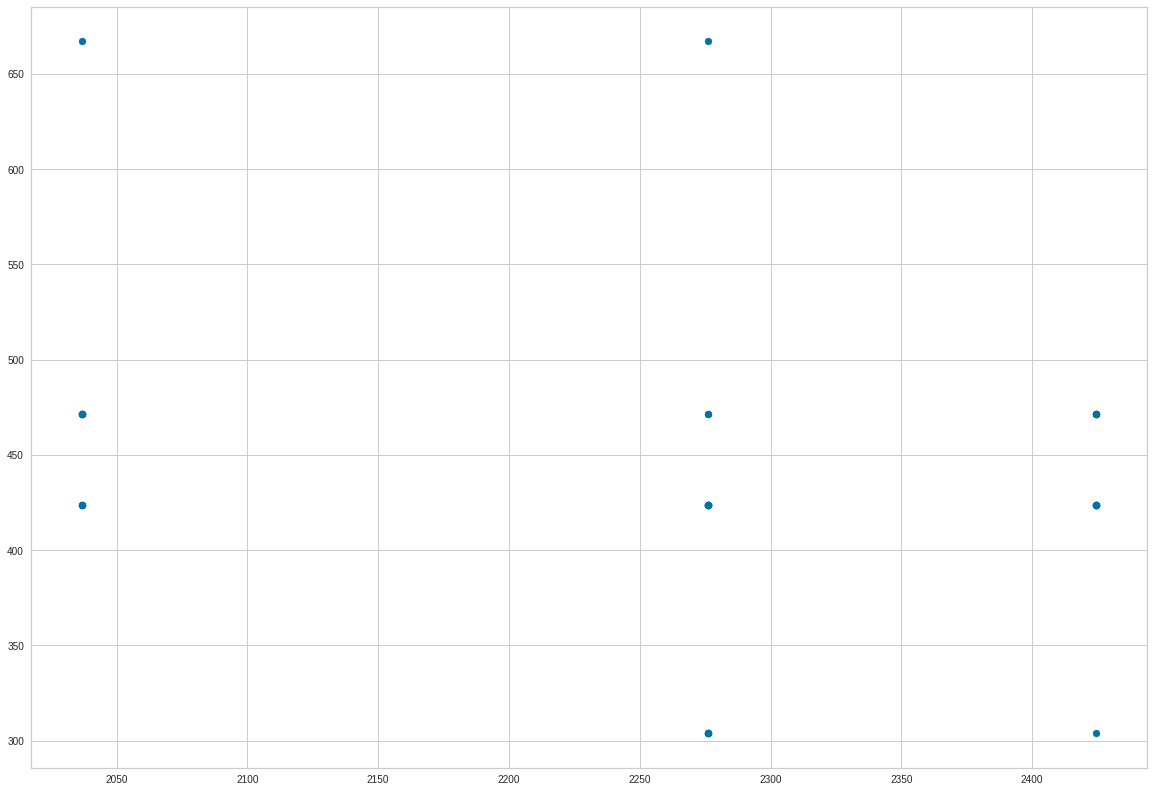

In [ ]:
plt.scatter(Final_data["La moyenne de l\'AGDD pour chaque cluster"], Final_data["La moyenne de l\'APRE pour chaque cluster"])

### ALOMERATTIVE

In [ ]:
#Final_data=pd.DataFrame(Final_data)
Final_data=pd.DataFrame(agdd_means["La moyenne de l'AGDD pour chaque cluster"])

In [ ]:
Final_data["APRE _timeseriesclustering"]=APRE_means["La moyenne de l'APRE pour chaque cluster"]
#Final_data["H_timeseriesclustering"]=H_means["The mean of H for each class"]
#Final_data["Vid_timeseriesclustering"]=V_means["The mean of V for each class"]
Final_data

La moyenne de l'AGDD pour chaque cluster  APRE _timeseriesclustering
Année                                                                      
1981                                2036.719545                  423.772500
1982                                2036.719545                  471.521538
1983                                2276.135000                  303.960000
1984                                2036.719545                  423.772500
1985                                2276.135000                  303.960000
1986                                2036.719545                  471.521538
1987                                2276.135000                  423.772500
1988                                2276.135000                  423.772500
1989                                2424.532308                  423.772500
1990                                2276.135000                  471.521538
1991                                2036.719545                  471.521538
1992                                2036.719545                  471.521538
1993                                2036.719545                  423.772500
1994                                2424.532308                  423.772500
1995                                2276.135000                  423.772500
1996                                2036.719545                  471.521538
1997                                2276.135000                  423.772500
1998                                2276.135000                  303.960000
1999                                2276.135000                  423.772500
2000                                2276.135000                  303.960000
2001                                2424.532308                  303.960000
2002                                2276.135000                  423.772500
2003                                2424.532308                  471.521538
2004                                2276.135000                  471.521538
2005                                2276.135000                  423.772500
2006                                2424.532308                  471.521538
2007                                2036.719545                  423.772500
2008                                2276.135000                  423.772500
2009                                2276.135000                  423.772500
2010                                2276.135000                  667.090000
2011                                2424.532308                  423.772500
2012                                2424.532308                  423.772500
2013                                2036.719545                  471.521538
2014                                2424.532308                  423.772500
2015                                2424.532308                  471.521538
2016                                2424.532308                  423.772500
2017                                2424.532308                  423.772500
2018                                2036.719545                  667.090000
2019                                2276.135000                  303.960000
2020                                2424.532308                  471.521538
2021                                2424.532308                  471.521538

In [ ]:
scaler = MinMaxScaler()
col = Final_data.columns
dfscaled = scaler.fit_transform(Final_data)
dfscaled = pd.DataFrame(dfscaled,columns=col, index=Final_data.index)
dfscaled.head()

La moyenne de l'AGDD pour chaque cluster  APRE _timeseriesclustering
Année                                                                      
1981                                   0.000000                    0.329944
1982                                   0.000000                    0.461437
1983                                   0.617348                    0.000000
1984                                   0.000000                    0.329944
1985                                   0.617348                    0.000000

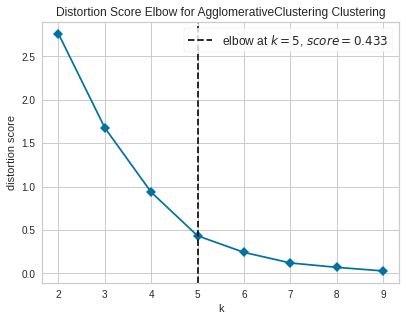

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(6.4,4.8))
from yellowbrick.cluster.elbow import kelbow_visualizer
visualizer=kelbow_visualizer(AgglomerativeClustering(n_clusters=5, affinity='euclidean'), dfscaled, k=(2,10),locate_elbow=True, timings=False)
NC= visualizer.elbow_value_

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
model.fit(dfscaled)

AgglomerativeClustering(n_clusters=5)

In [ ]:
#df2['HR_Cluster_ID']=model.labels_
#df2.head()

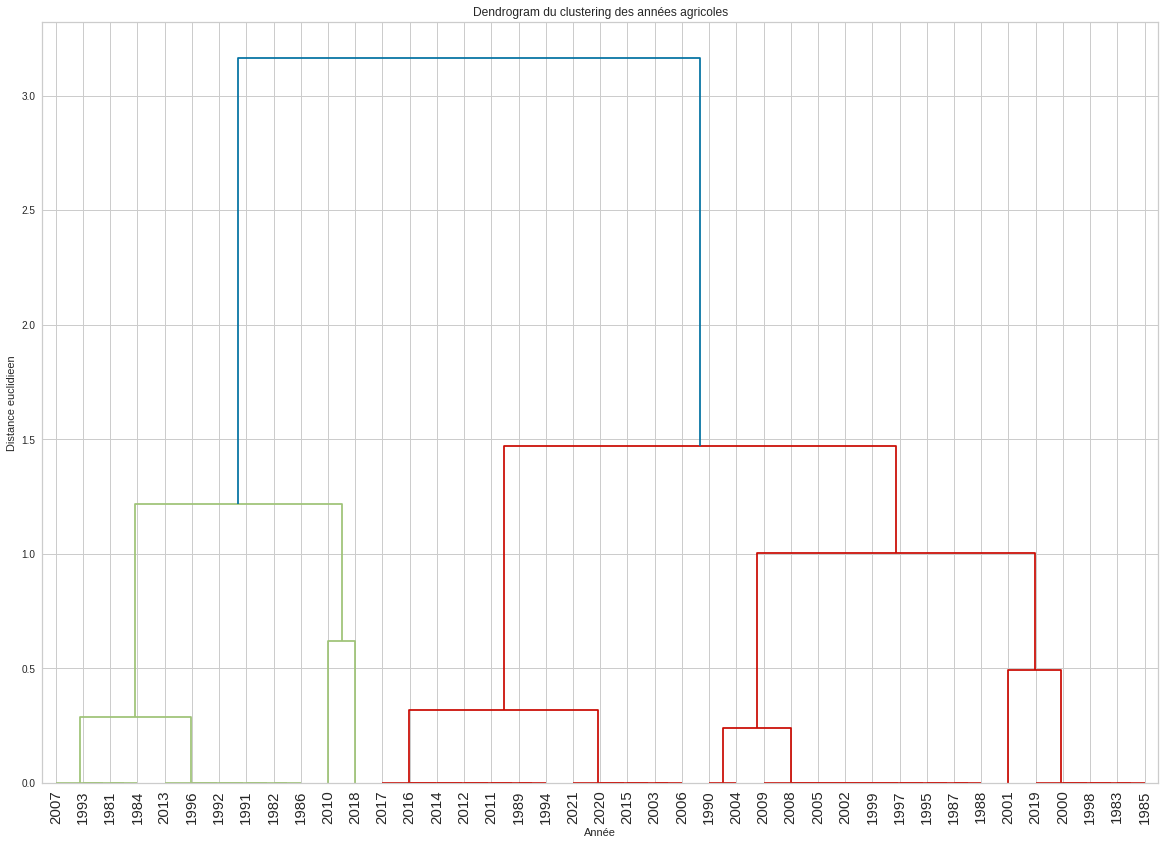

In [ ]:

import scipy.cluster.hierarchy as sch
plt.rcParams["figure.figsize"] = [20, 14]
dendrogram = sch.dendrogram(sch.linkage(dfscaled, method  = "ward"),leaf_rotation=90, leaf_font_size=15 ,show_contracted=True,labels=dfscaled.index)
plt.title('Dendrogram du clustering des années agricoles')
plt.xlabel('Année')
plt.ylabel('Distance euclidieen')
plt.axhline(y=1000, c='black', lw=2, linestyle='dashed',linewidth=10)

plt.show()

### Profiling

In [ ]:
Final_data.head()

La moyenne de l'AGDD pour chaque cluster  APRE _timeseriesclustering
Année                                                                      
1981                                2036.719545                  423.772500
1982                                2036.719545                  471.521538
1983                                2276.135000                  303.960000
1984                                2036.719545                  423.772500
1985                                2276.135000                  303.960000

In [ ]:
pd.set_option('max_columns',9)
# Add cluster labels
Final_data['cluster_ids'] = predictions

# Overall level summary
df_profile_overall = Final_data.describe().T
df_profile_overall
# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall['Overall Dataset'] = df_profile_overall[['mean']]
df_profile_overall = df_profile_overall[['Overall Dataset']]
# Cluster ID level summary
df_cluster_summary = Final_data.groupby('cluster_ids').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})
# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')
# join into single summary dataset
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index
df_profile

metric            0            1  \
column                                                                      
La moyenne de l'AGDD pour chaque cluster   mean  2276.135000  2036.719545   
APRE _timeseriesclustering                 mean   432.454143   452.421923   

                                                    2            3         4  \
column                                                                         
La moyenne de l'AGDD pour chaque cluster  2424.532308  2156.427273  2276.135   
APRE _timeseriesclustering                 432.921169   667.090000   303.960   

                                          Overall Dataset  
column                                                     
La moyenne de l'AGDD pour chaque cluster      2258.954390  
APRE _timeseriesclustering                     433.248049

In [ ]:
df_profile=df_profile.rename(columns =({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5"}))
df_profile

metric    Cluster 1    Cluster 2  \
column                                                                      
La moyenne de l'AGDD pour chaque cluster   mean  2276.135000  2036.719545   
APRE _timeseriesclustering                 mean   432.454143   452.421923   

                                            Cluster 3    Cluster 4  Cluster 5  \
column                                                                          
La moyenne de l'AGDD pour chaque cluster  2424.532308  2156.427273   2276.135   
APRE _timeseriesclustering                 432.921169   667.090000    303.960   

                                          Overall Dataset  
column                                                     
La moyenne de l'AGDD pour chaque cluster      2258.954390  
APRE _timeseriesclustering                     433.248049

In [ ]:
df_profile.T

column          La moyenne de l'AGDD pour chaque cluster  \
metric                                              mean   
Cluster 1                                       2276.135   
Cluster 2                                    2036.719545   
Cluster 3                                    2424.532308   
Cluster 4                                    2156.427273   
Cluster 5                                       2276.135   
Overall Dataset                               2258.95439   

column          APRE _timeseriesclustering  
metric                                mean  
Cluster 1                       432.454143  
Cluster 2                       452.421923  
Cluster 3                       432.921169  
Cluster 4                           667.09  
Cluster 5                           303.96  
Overall Dataset                 433.248049

# PCA (No need?)

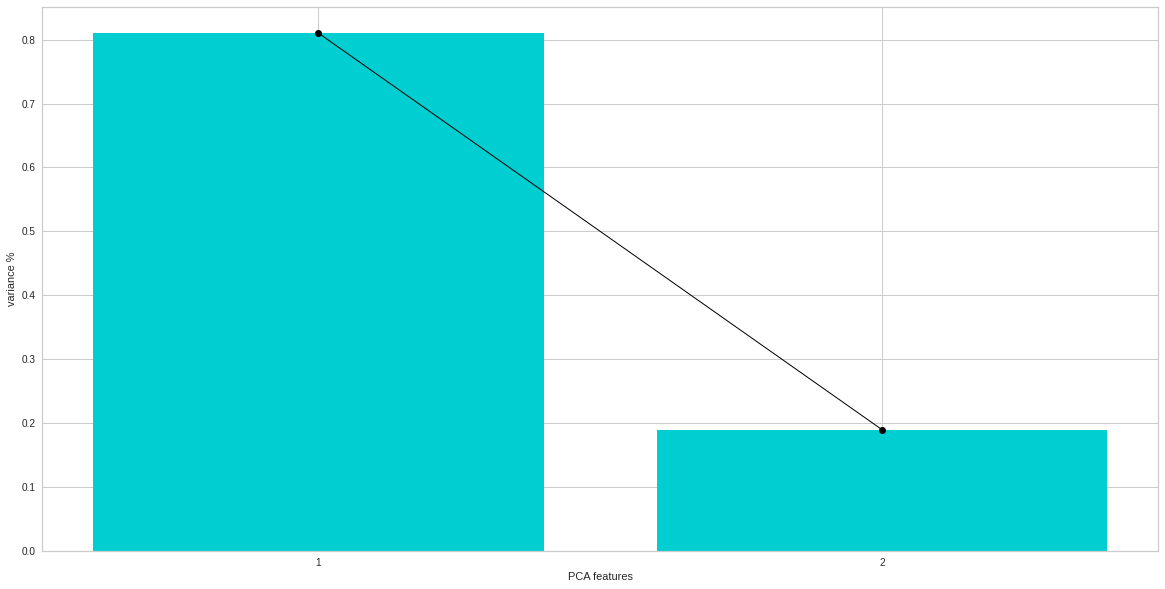

In [ ]:
#la variance expliquéE
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Final_data.loc[:, Final_data.columns !='Final_Clustering'])
features = np.arange(pca.n_components_)+1
plt.bar(features, pca.explained_variance_ratio_, color='darkturquoise')
plt.plot(features, pca.explained_variance_ratio_, 'o-', linewidth=1, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

<Figure size 720x720 with 0 Axes>

In [ ]:
#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')
#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')
#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)

columns=Final_data.columns.values 
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )

In [ ]:

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(Final_data.loc[:, Final_data.columns !='Final_Clustering'])

In [ ]:
pca_values=pca.components_


In [ ]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'], index=Final_data.index)
results = results.join(Final_data['Final_Clustering'])
results=results.reset_index()
results.head()

KeyError: ignored

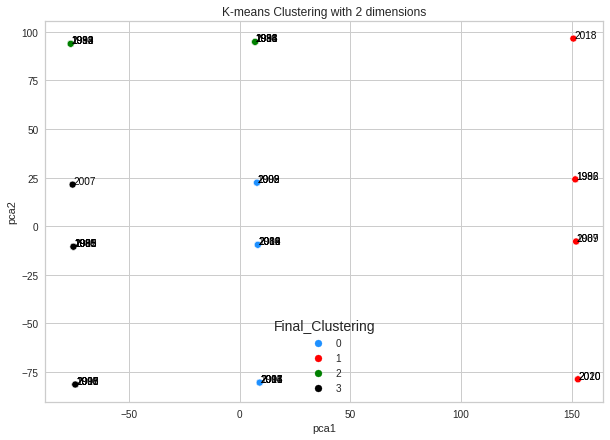

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x="", y="pca2", hue=results['Final_Clustering'], data=results,palette=['dodgerblue','red','green','black'], legend='full')
for i in range(results.shape[0]):
    plt.text(x=results.pca1[i]+0.3,y=results.pca2[i]+0.3,s=results.YEAR[i], 
          fontdict=dict(color='black',size=10))
          #bbox=dict(facecolor='yellow',alpha=0.5))

plt.title('K-means Clustering with 2 dimensions') 
plt.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x, y=z, z=z, color=results['Final_Clustering'],text=Final_data['YEAR'], size_max=18, opacity=0.7)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# **Agglomerative clustering**

In [ ]:
!pip install dtaidistance

In [ ]:
series = T.to_numpy()

In [ ]:
from dtaidistance import clustering
from dtaidistance import dtw, clustering
 

model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(series)
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)

 98%|█████████▊| 39/40 [00:00<00:00, 6797.90it/s]


(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a810a450>,
       dtype=object))

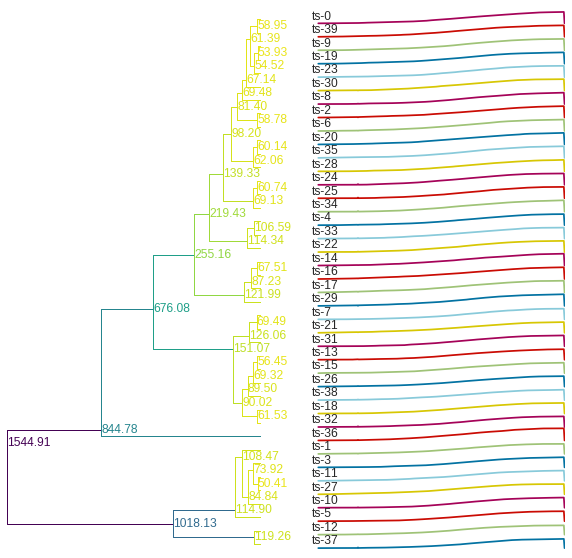

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model2.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

In [ ]:
pip install PyClustering

In [ ]:
from dtaidistance import dtw, clustering
 
model5 = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=10)
cluster_idx = model5.fit(series)

(<Figure size 576x396 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a6fbe150>,
       dtype=object))

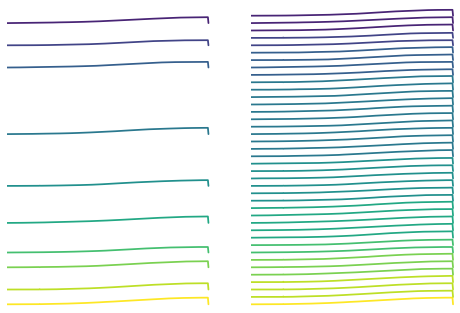

In [ ]:
model5.plot()